In [33]:
import pandas as pd

df = pd.read_excel("Core Software Engineer Archetype.xlsx", engine="openpyxl")

df = df.loc[:, ~df.columns.str.contains("Any comments on the above topics you would like to discuss?", case=False)]

df.columns = df.columns.str.replace(r"\[submitted as .*?\]", "", regex=True)

In [34]:
df_from_G_onwards = df.iloc[:, 6:]

novice_counts = (df_from_G_onwards == "Novice").sum()
advanced_beginner_counts = (df_from_G_onwards == "Advanced Beginner").sum()
competent_counts = (df_from_G_onwards == "Competent").sum()
proficient_counts = (df_from_G_onwards == "Proficient").sum()
expert_counts = (df_from_G_onwards == "Expert").sum()
remove_counts = (df_from_G_onwards == "Not a Core SE archetype topic").sum()
unclear_counts = (df_from_G_onwards == "Unclear").sum()

overview = pd.DataFrame({
    'Novice': novice_counts,
    'Advanced Beginner': advanced_beginner_counts,
    'Competent': competent_counts,
    'Proficient': proficient_counts,
    'Expert': expert_counts,
    'Not a Core SE archetype topic': remove_counts,
    'Unclear': unclear_counts
}).reset_index()

# Find the category with the maximum count for each row and add it as a new column
overview['Max Category'] = overview.iloc[:, 1:].idxmax(axis=1)
overview['More than 8 Unclear'] = overview['Unclear'] > 7
overview['More than 8 Remove'] = overview['Not a Core SE archetype topic'] > 7
overview['Total Counts'] = overview.iloc[:, 1:-3].sum(axis=1)
overview['Agreement'] = (
    (overview['Novice'] > (overview['Total Counts'] / 2)) |
    (overview['Advanced Beginner'] > (overview['Total Counts'] / 2)) |
    (overview['Competent'] > (overview['Total Counts'] / 2)) |
    (overview['Proficient'] > (overview['Total Counts'] / 2)) |
    (overview['Expert'] > (overview['Total Counts'] / 2))
)

overview.to_excel('output_file.xlsx', index=False)

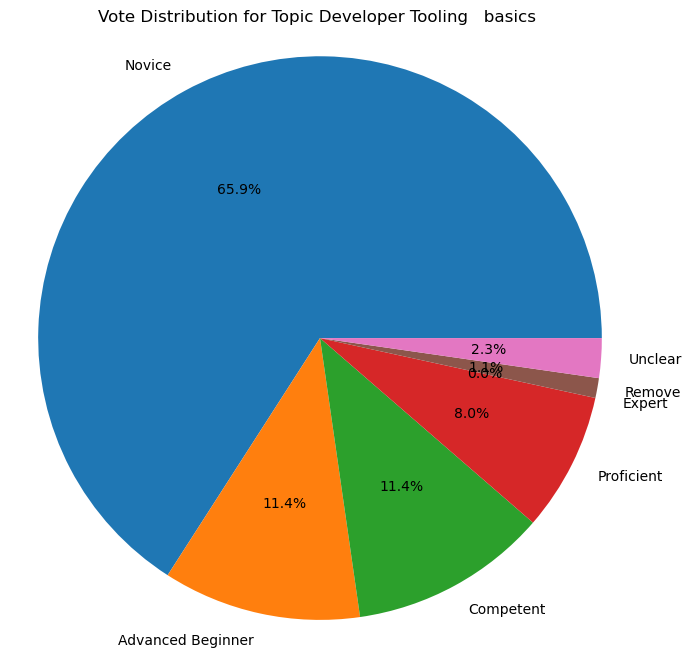

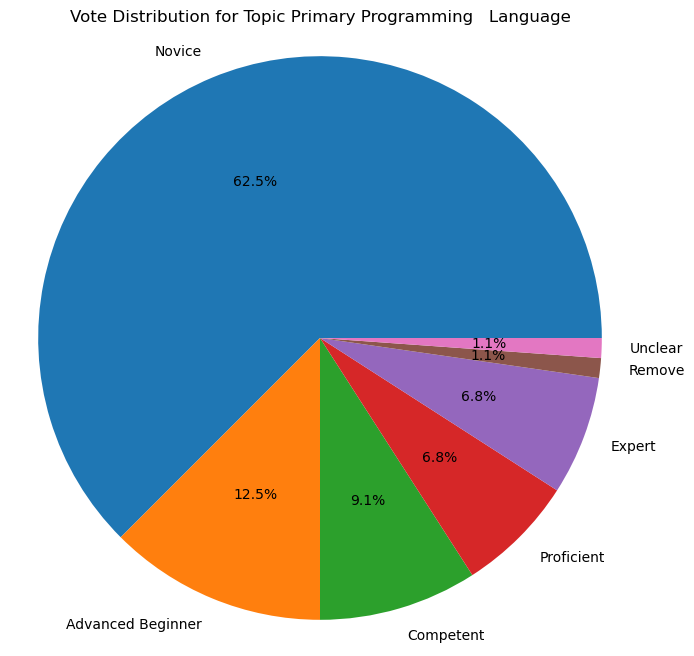

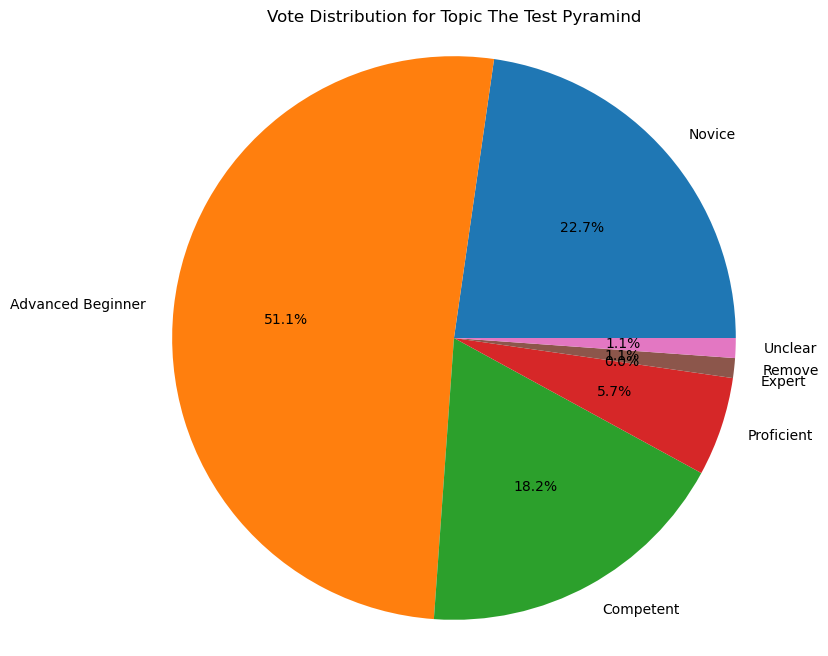

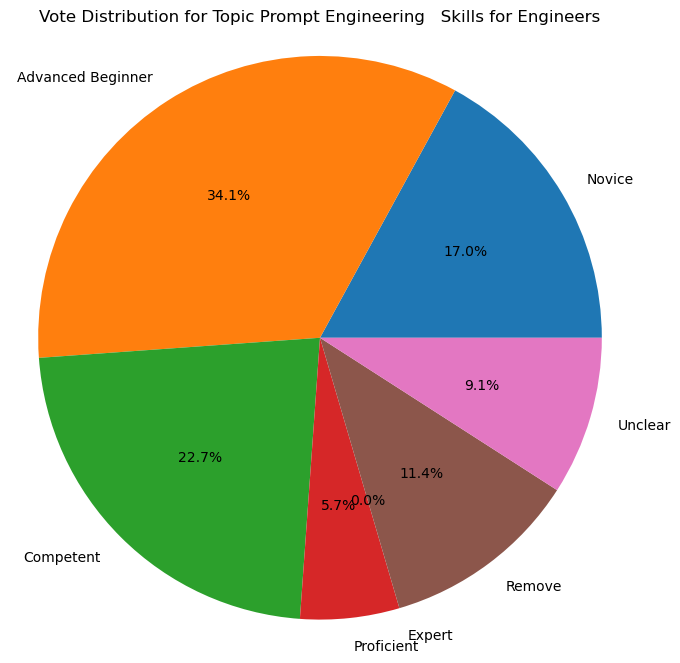

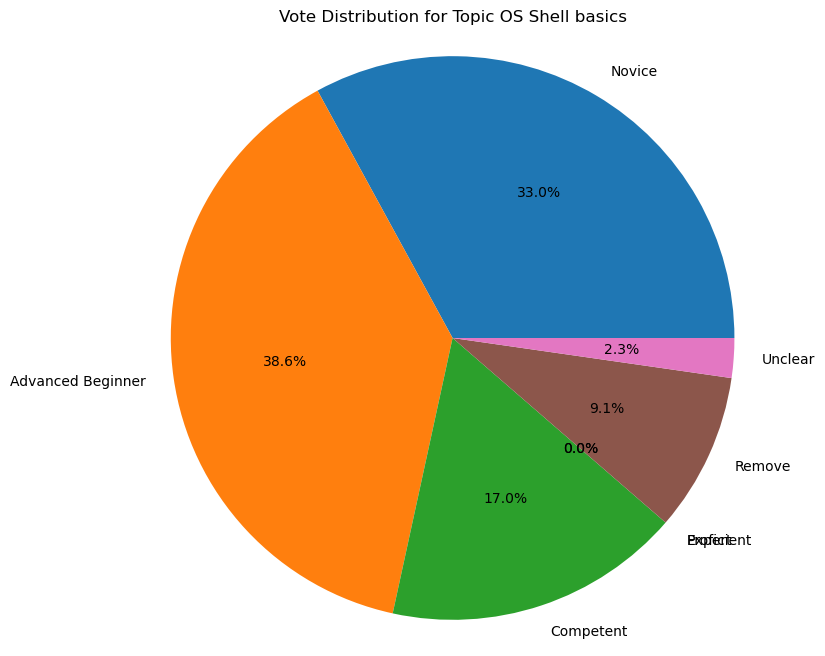

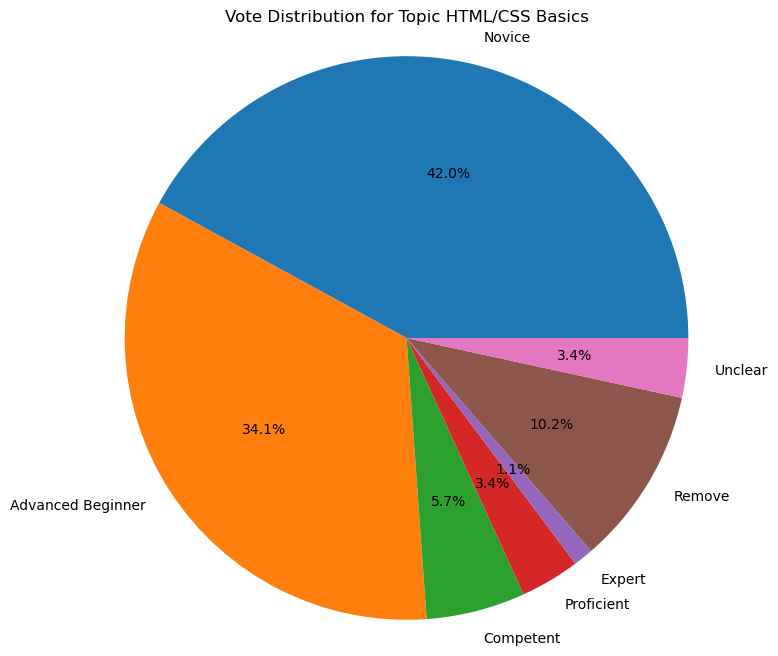

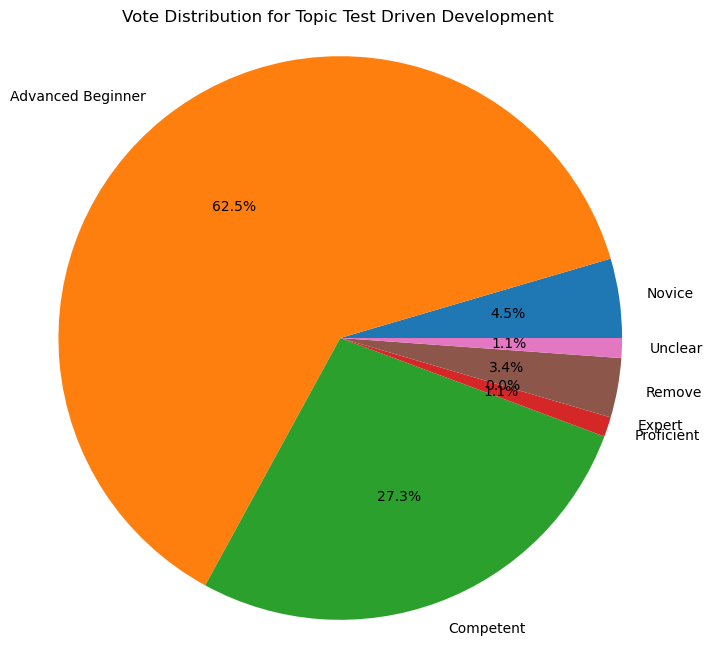

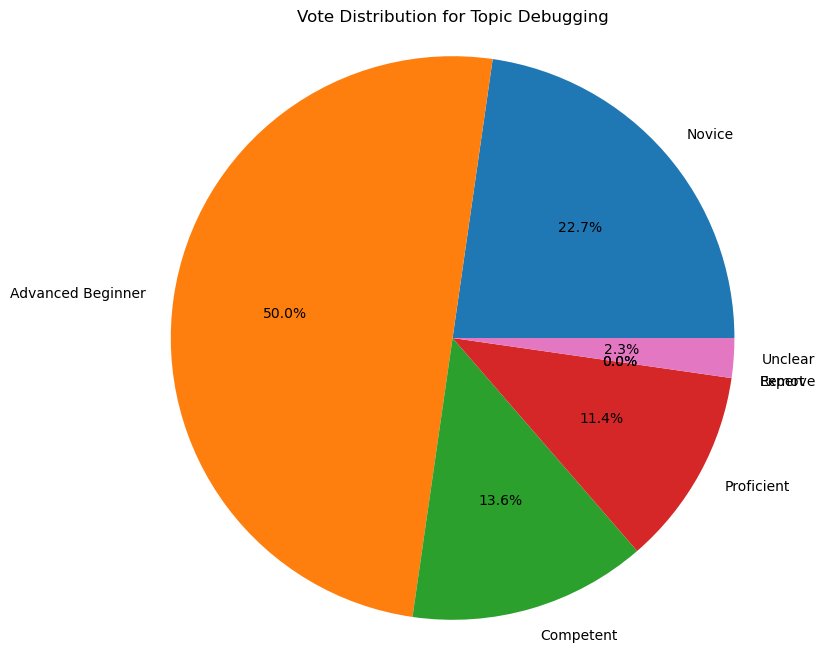

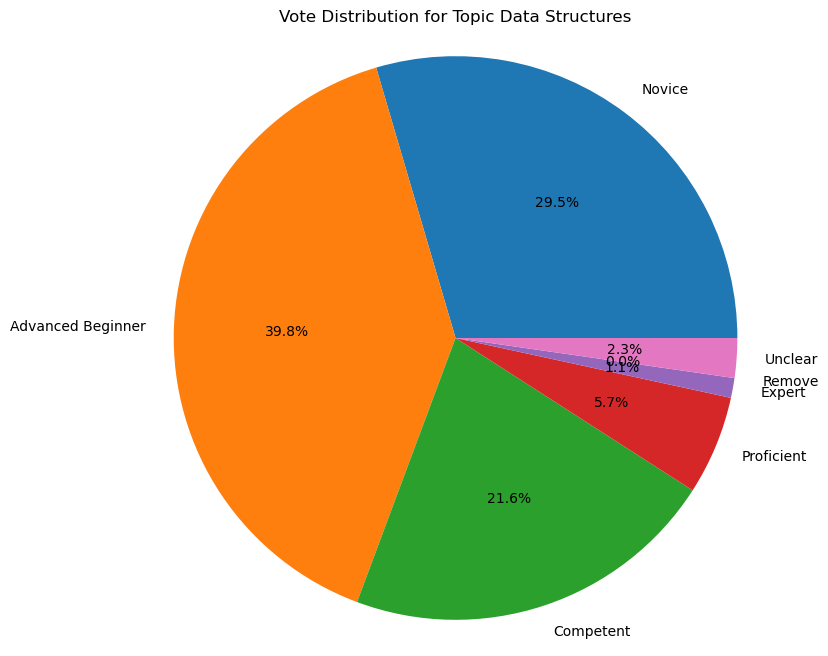

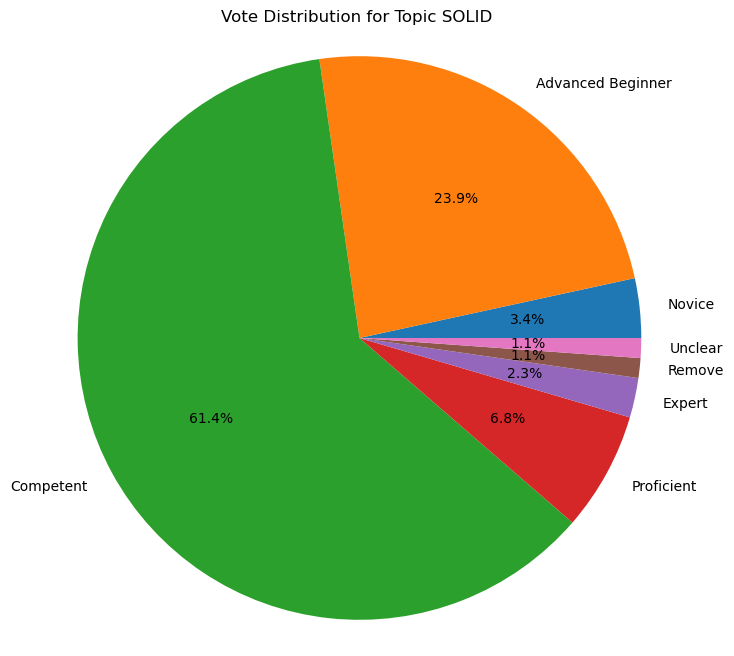

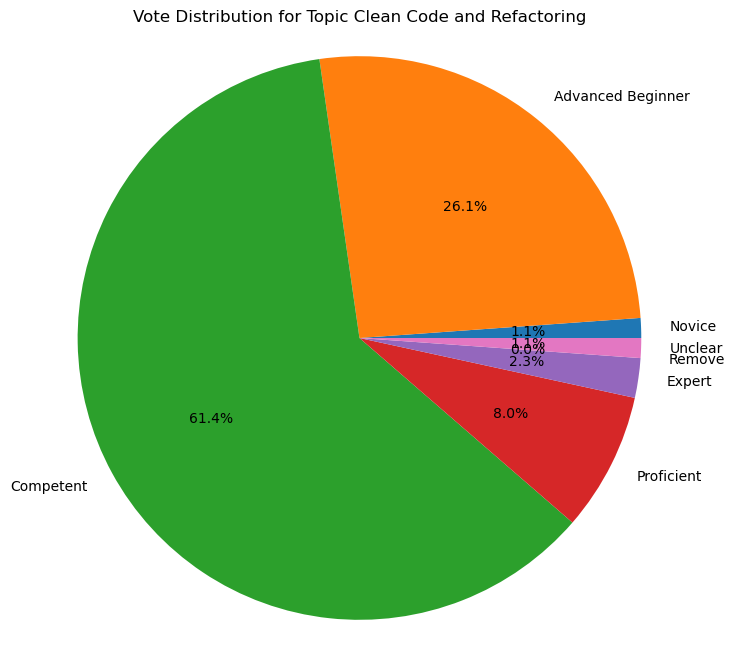

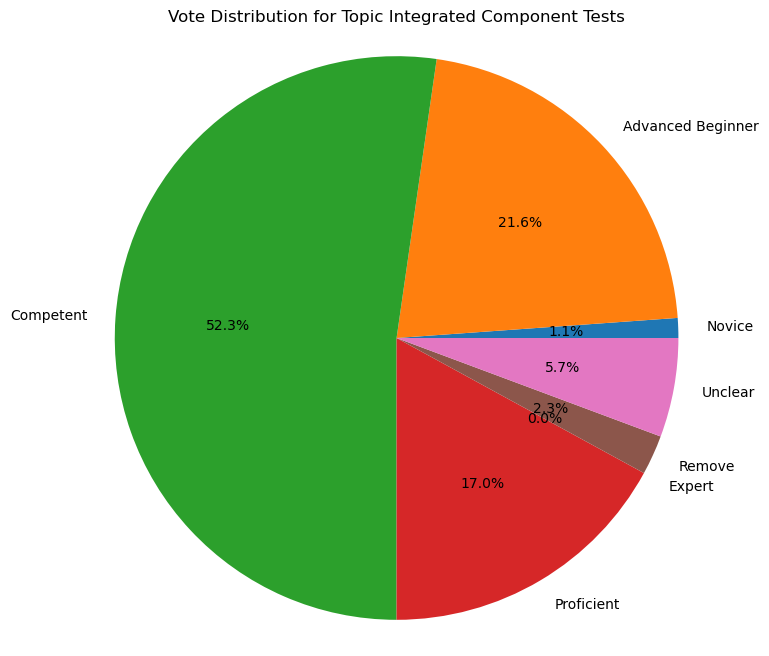

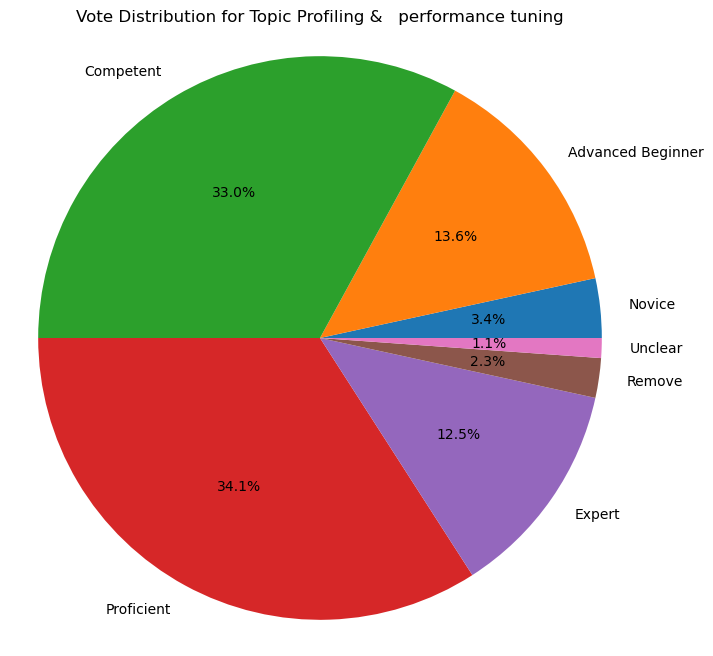

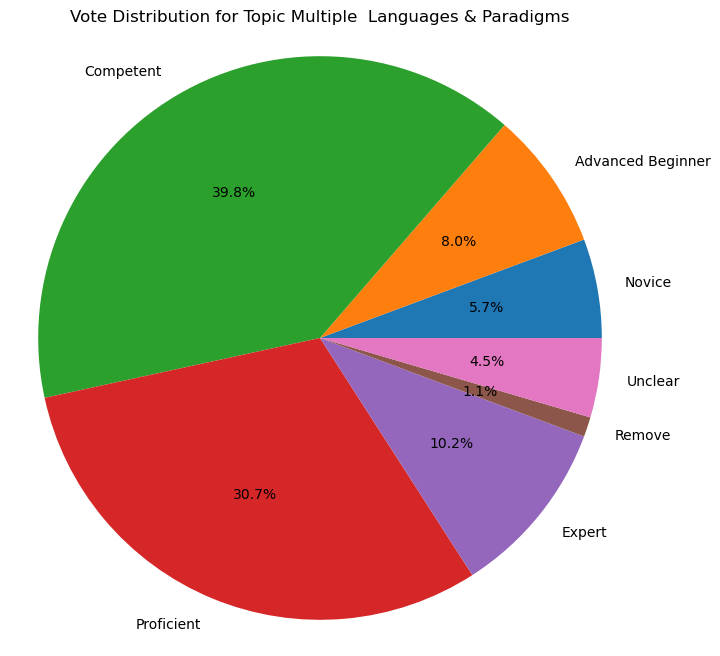

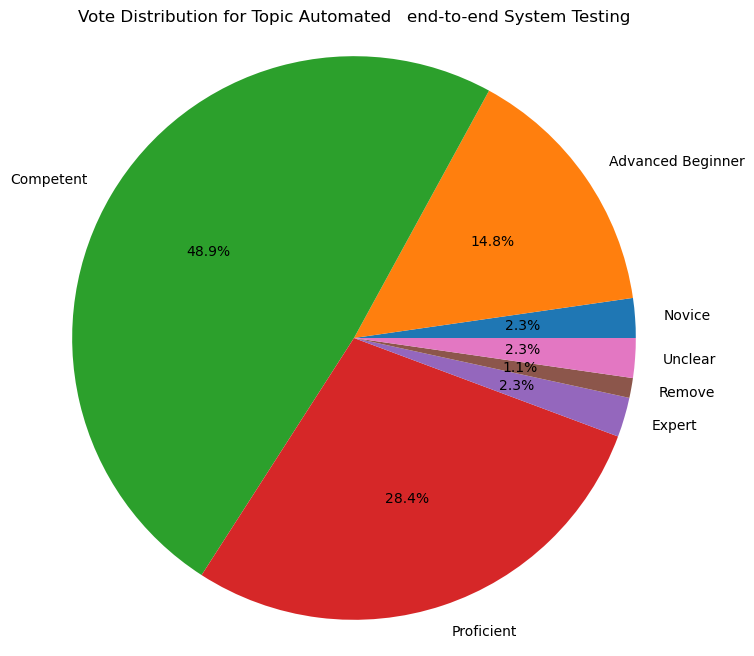

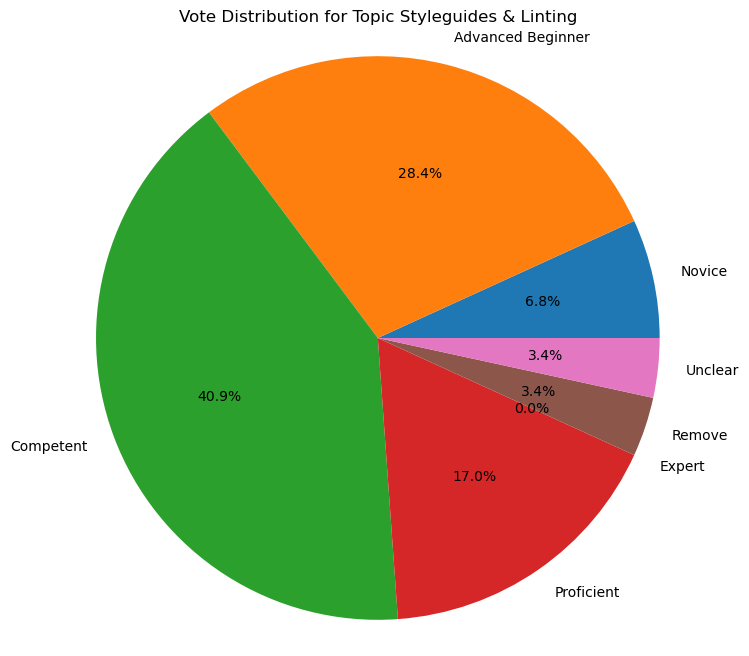

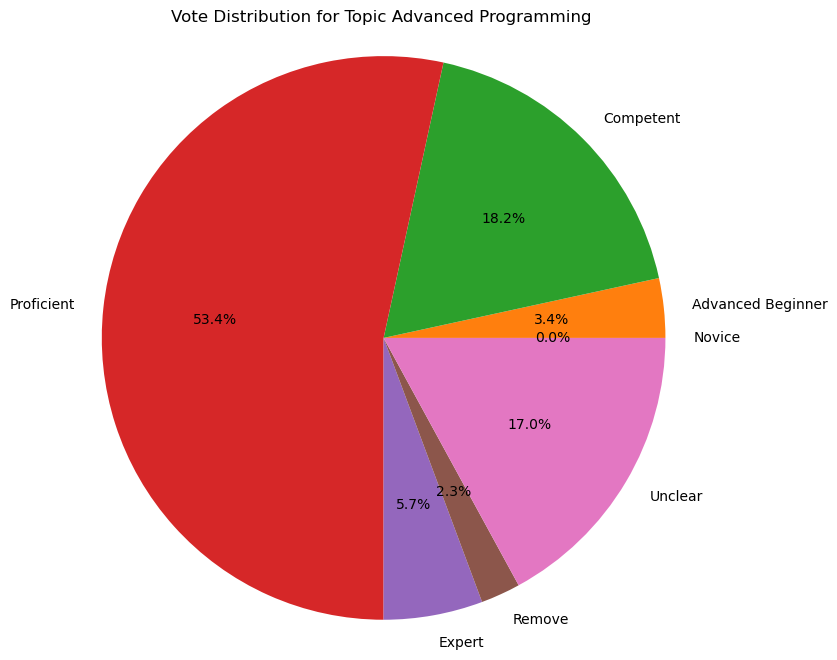

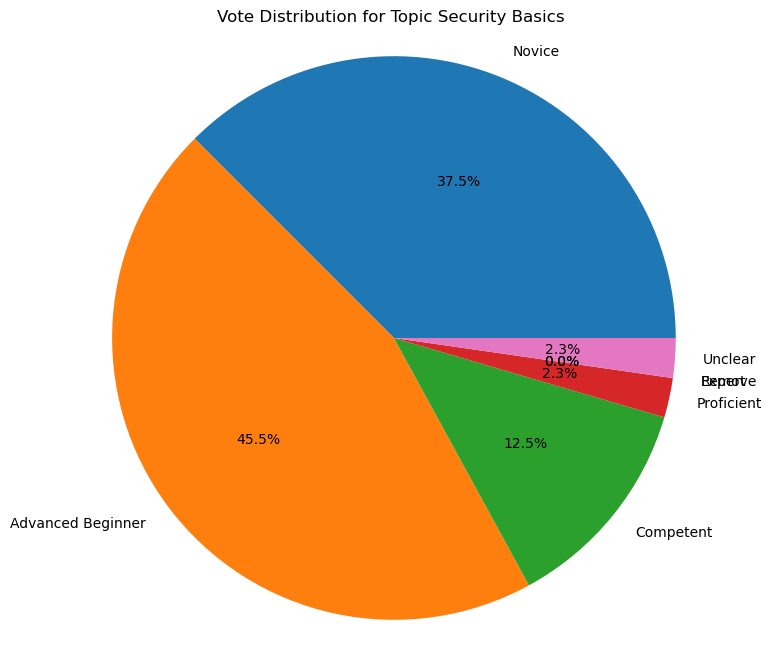

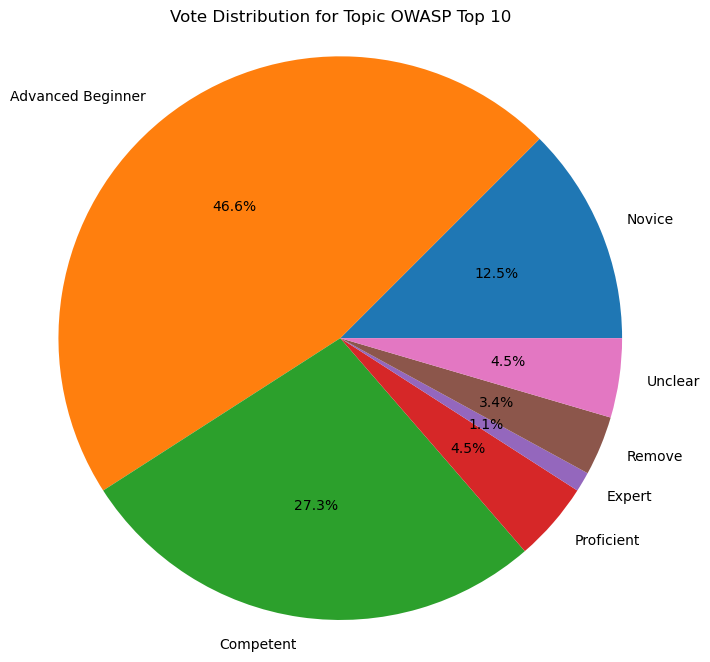

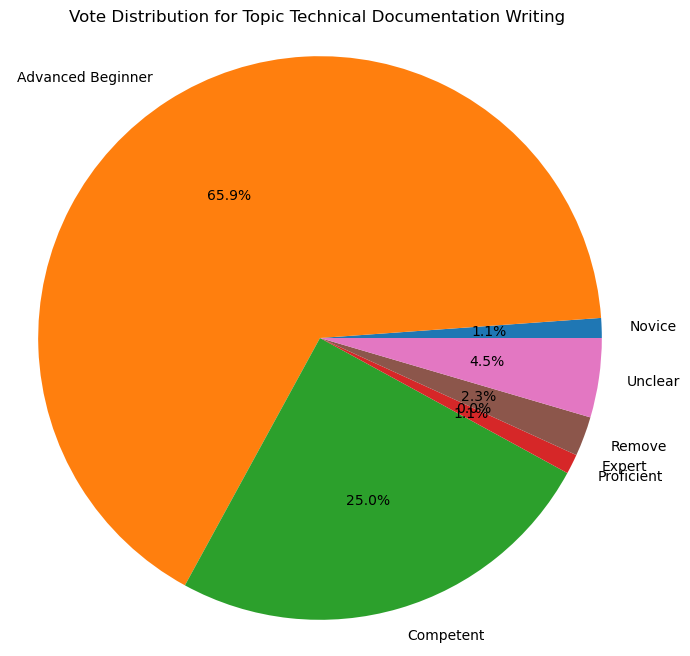

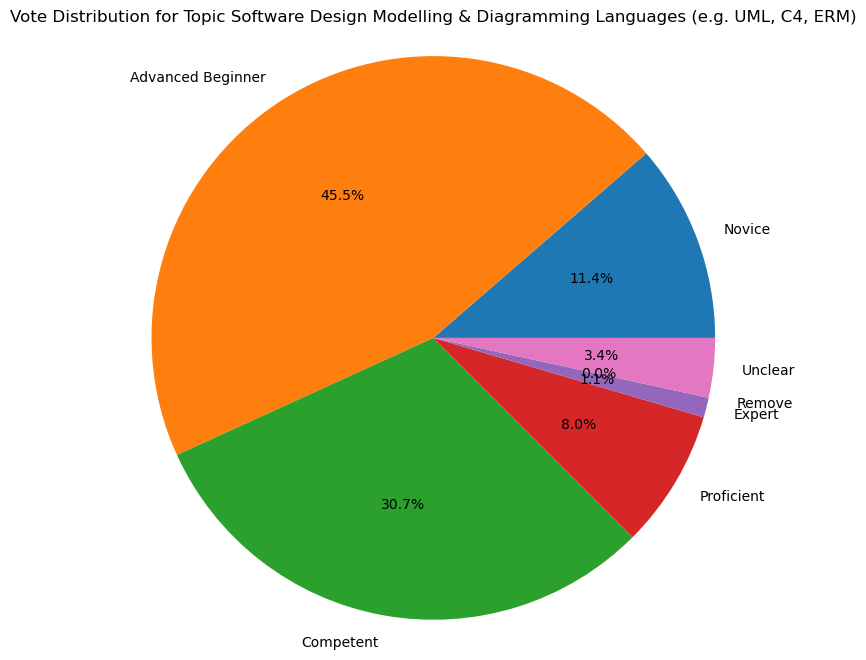

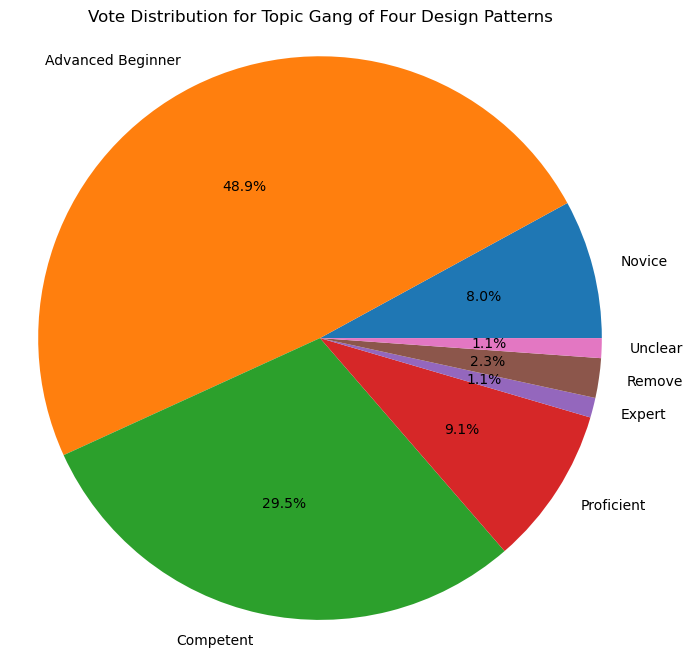

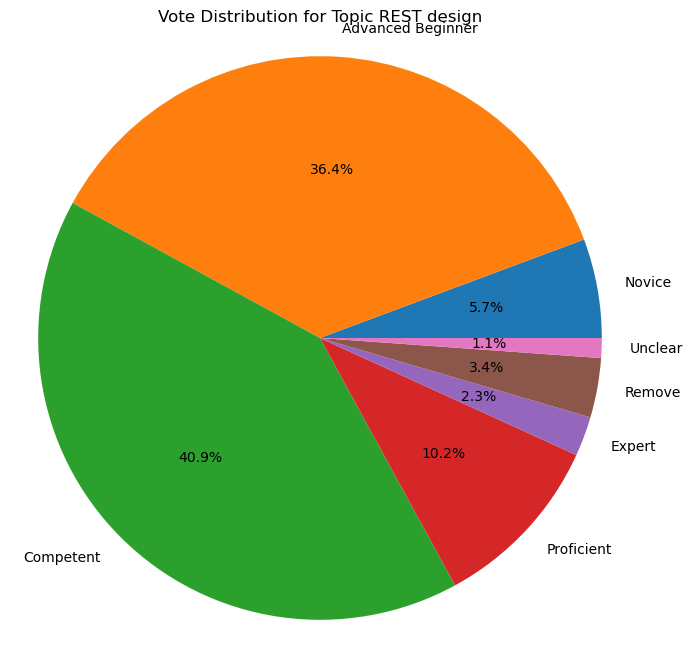

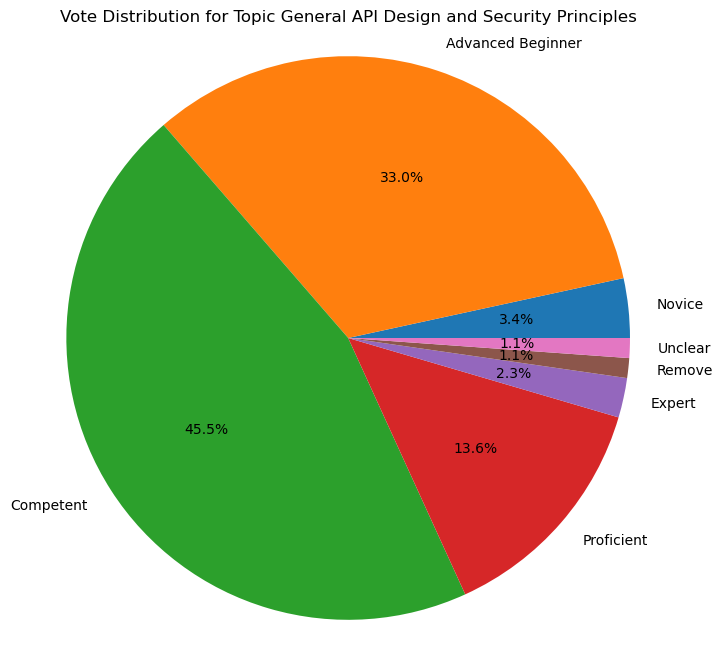

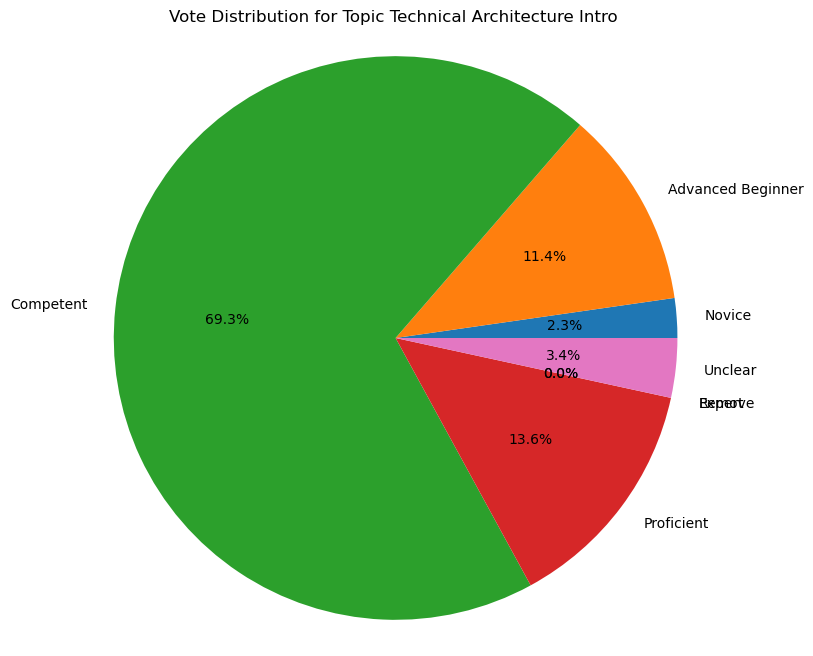

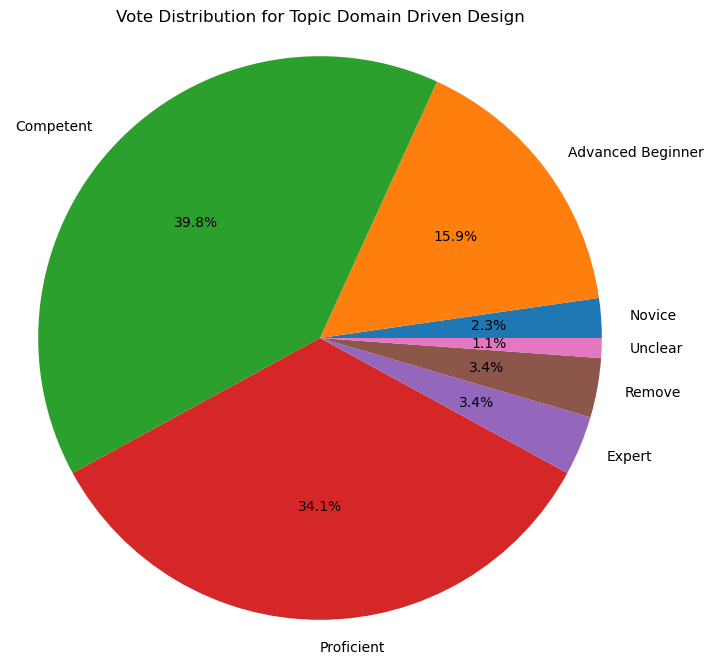

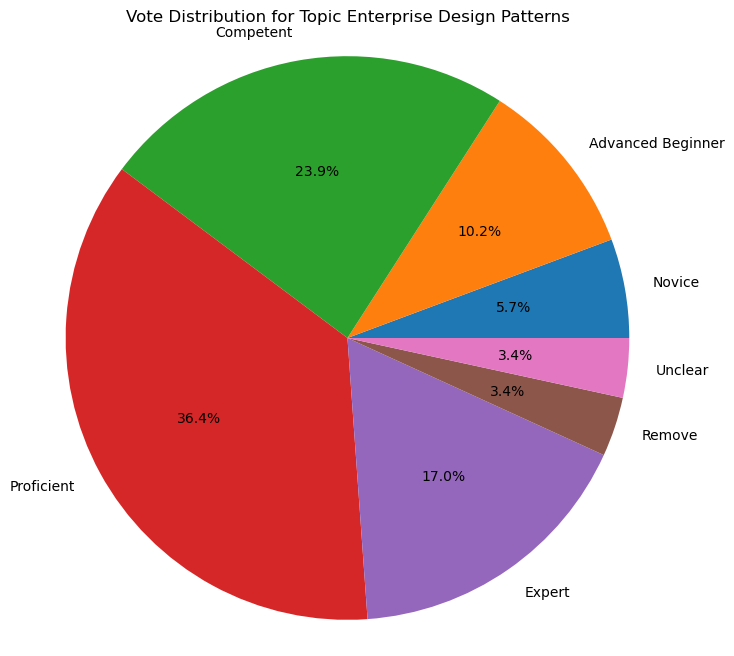

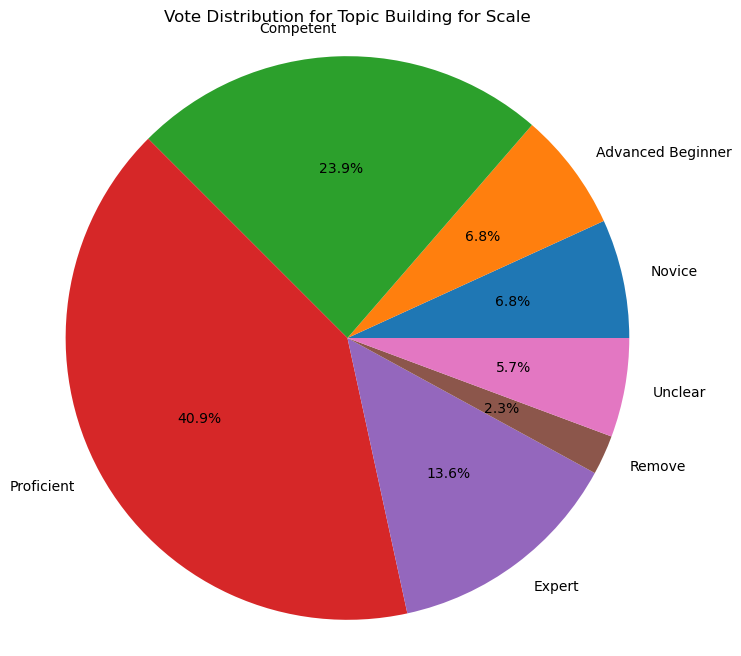

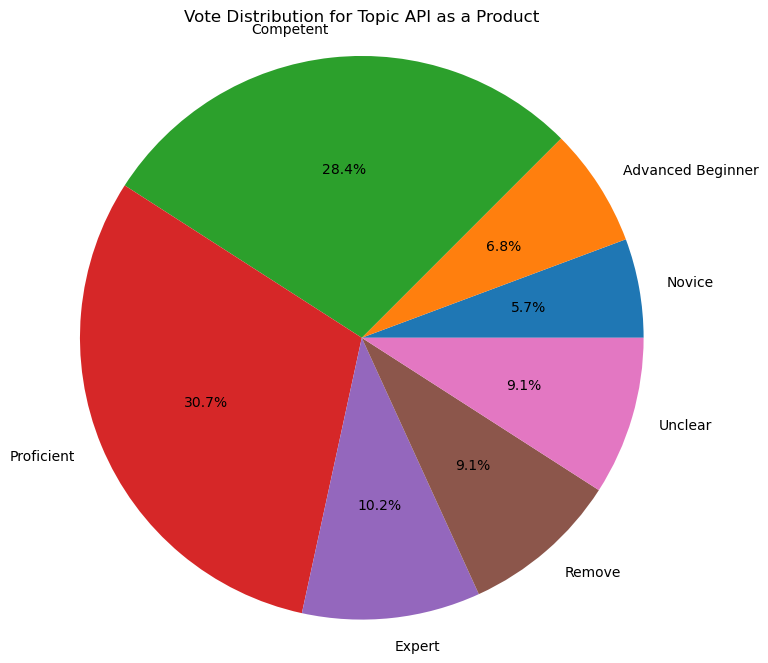

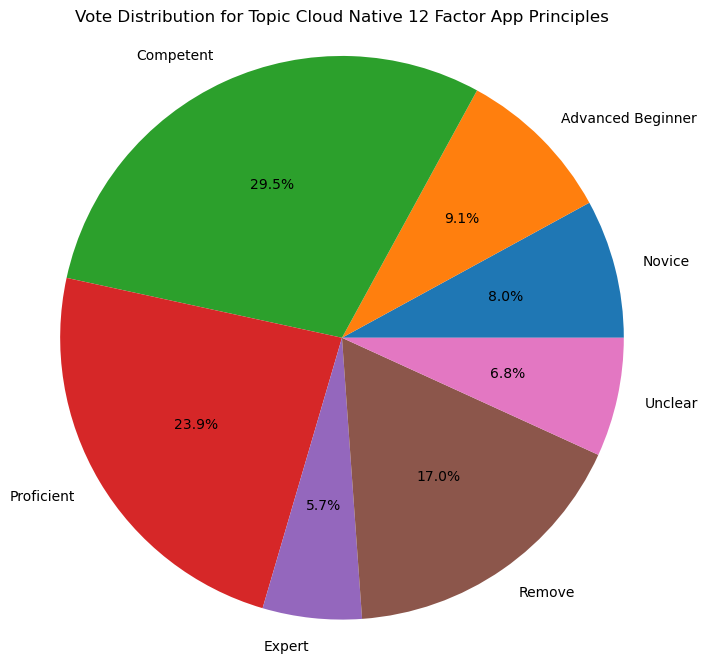

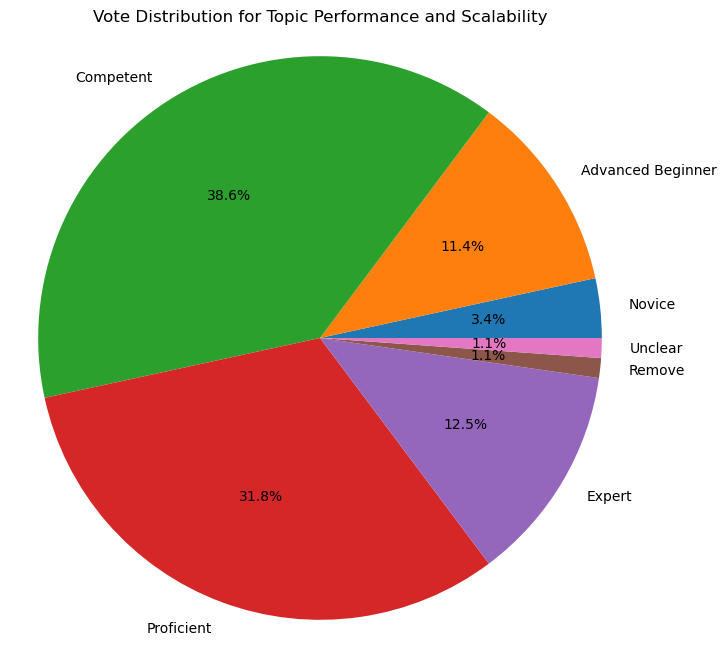

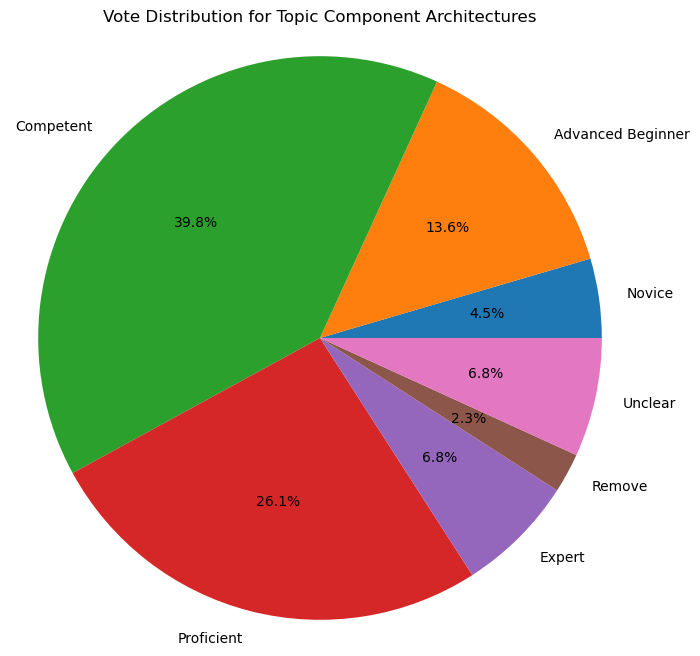

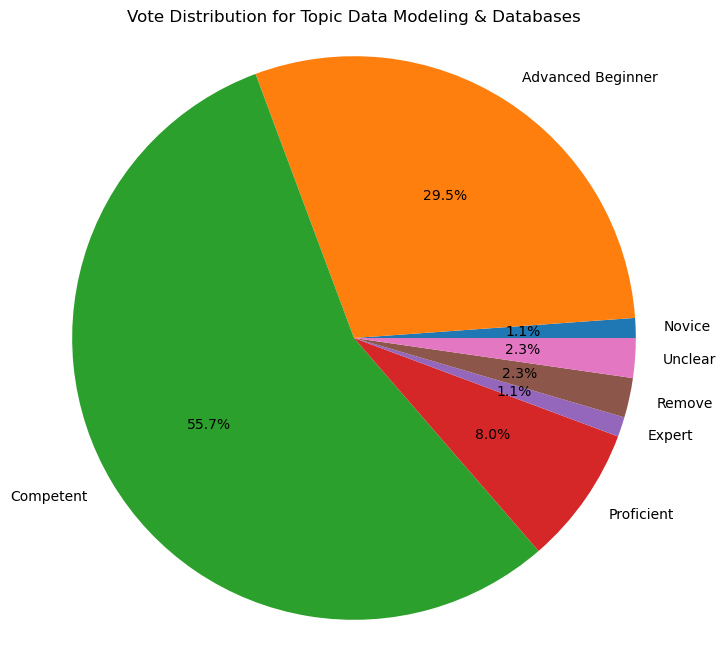

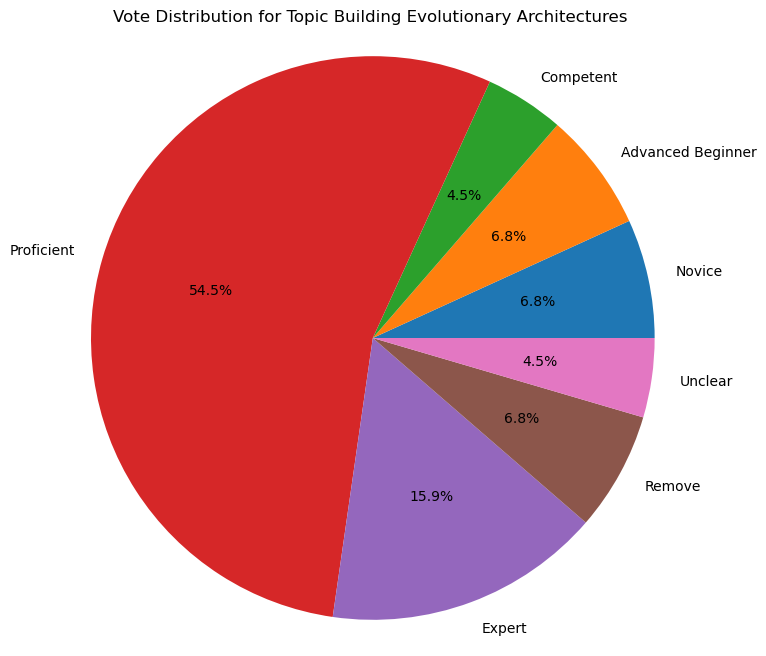

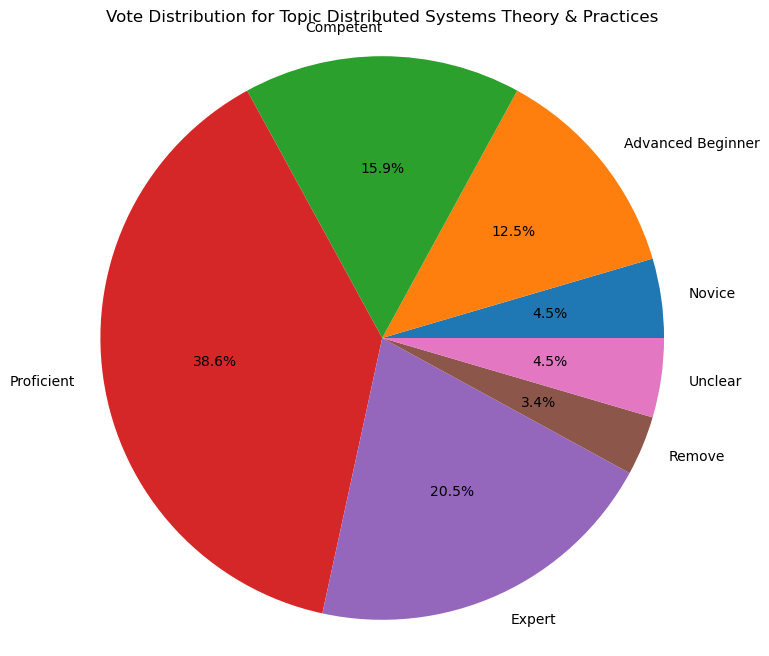

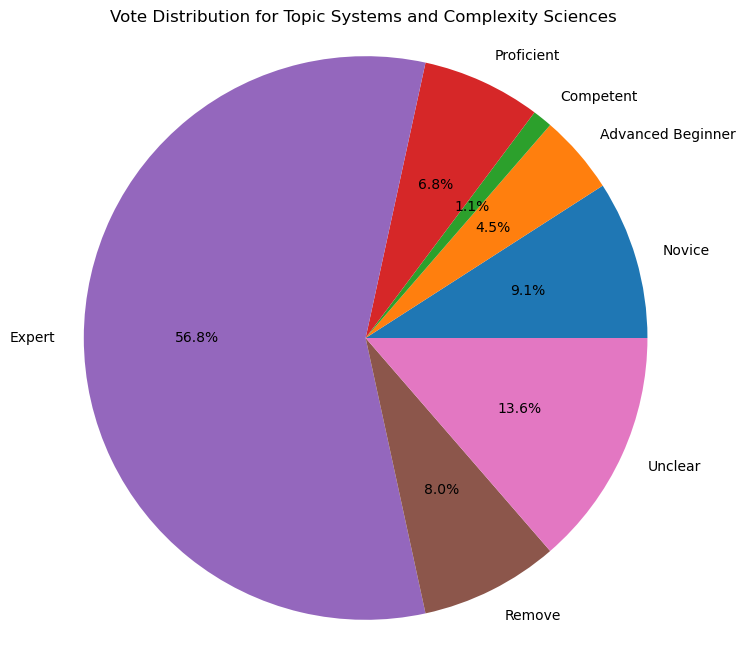

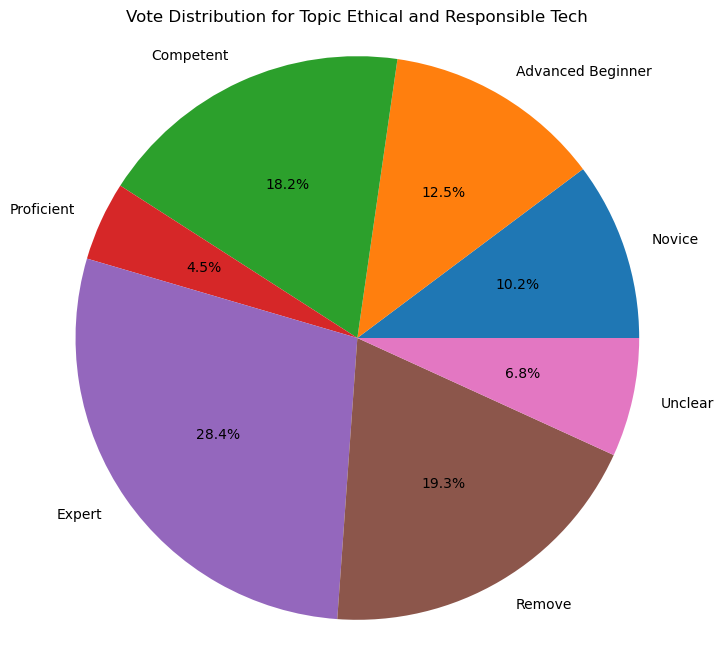

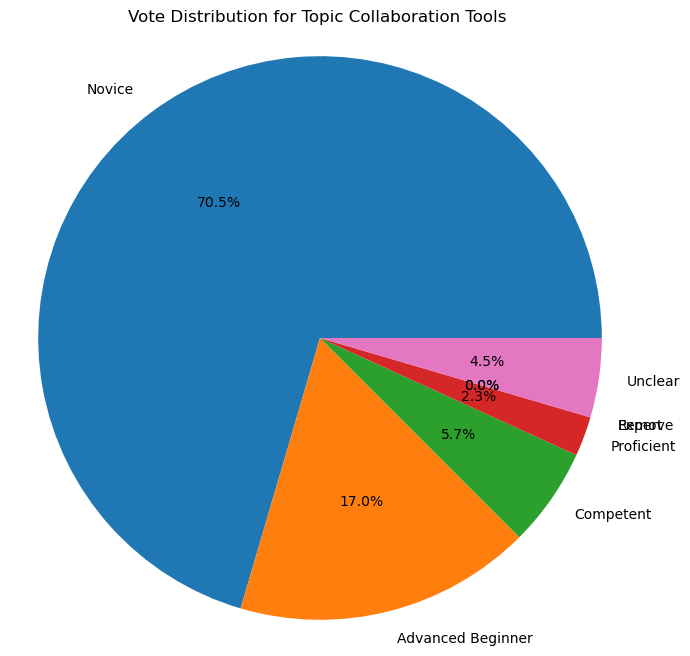

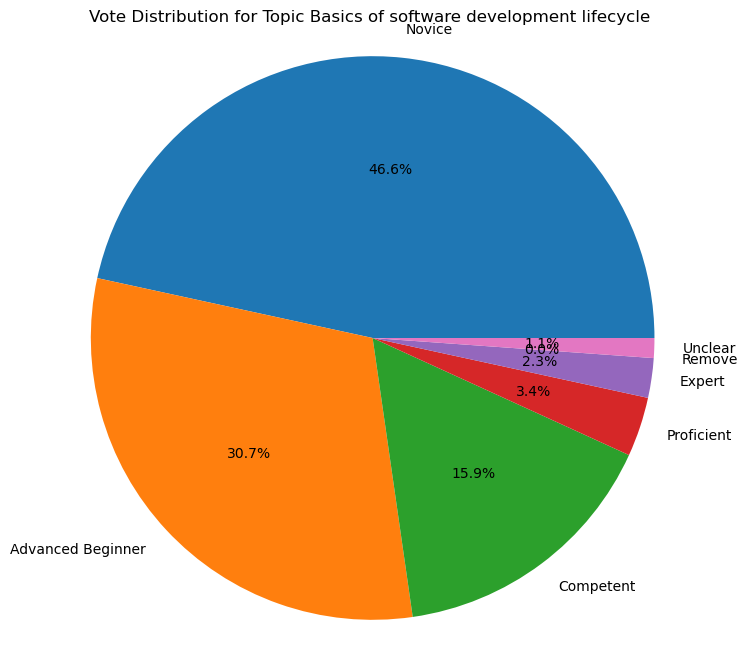

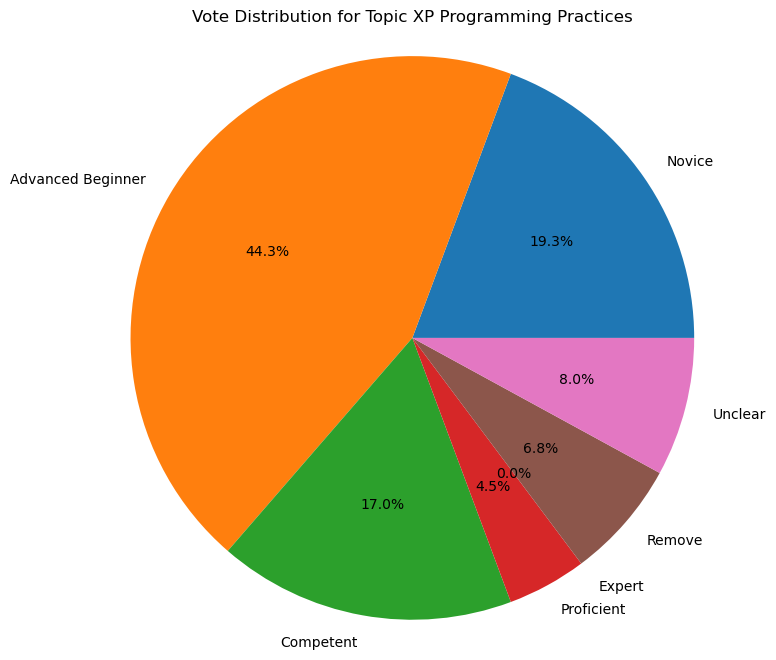

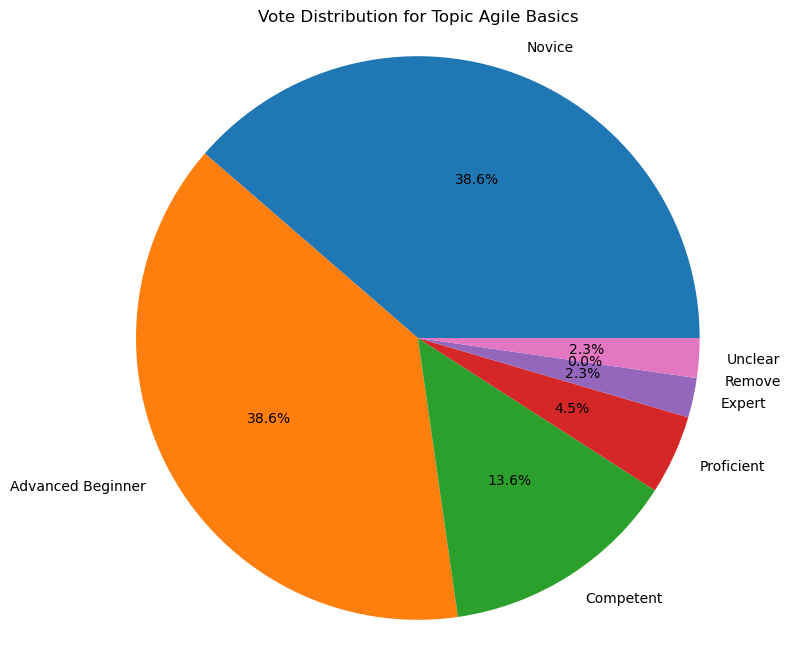

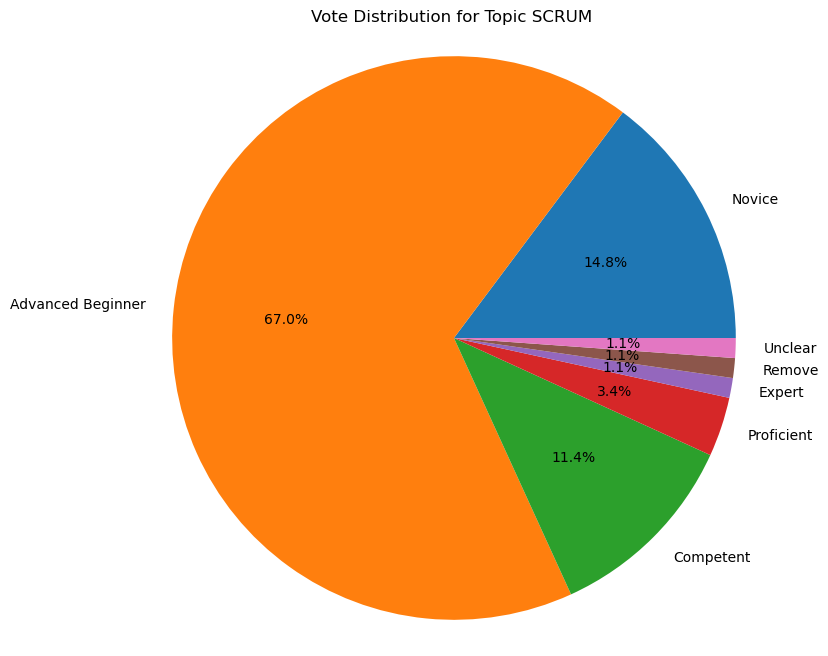

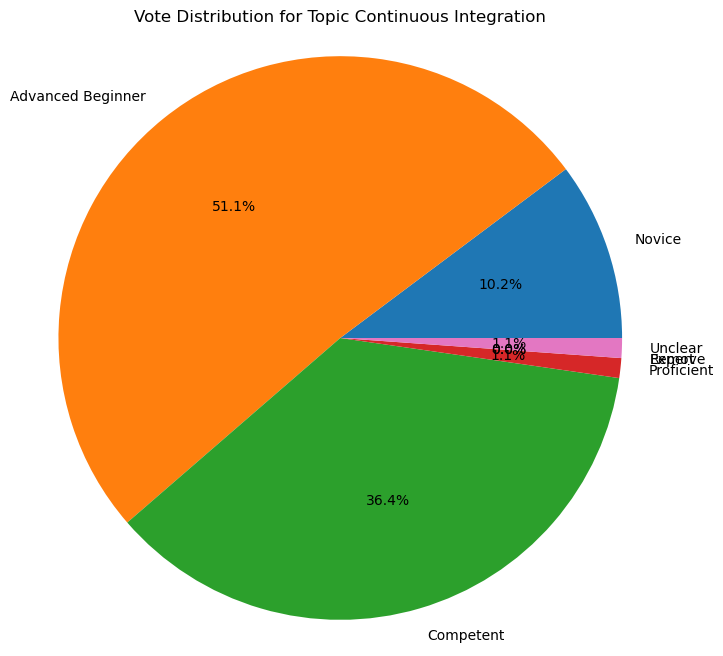

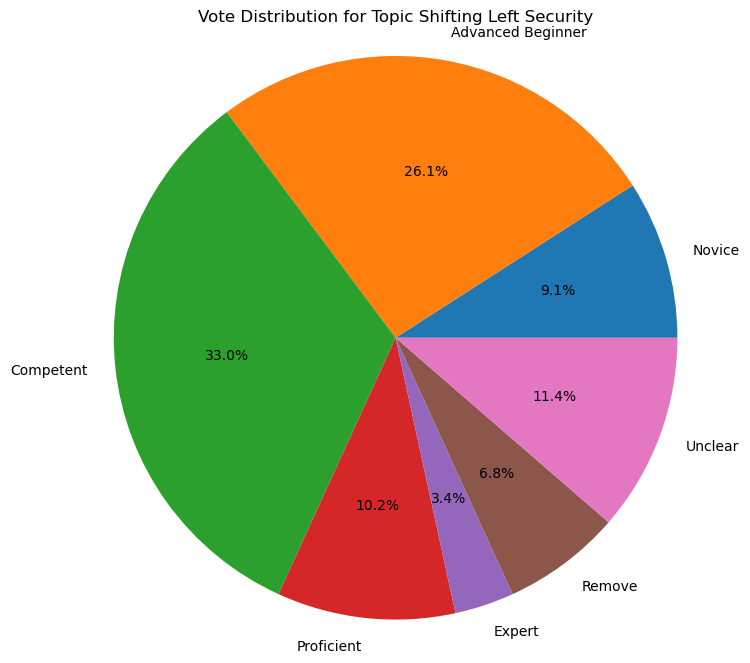

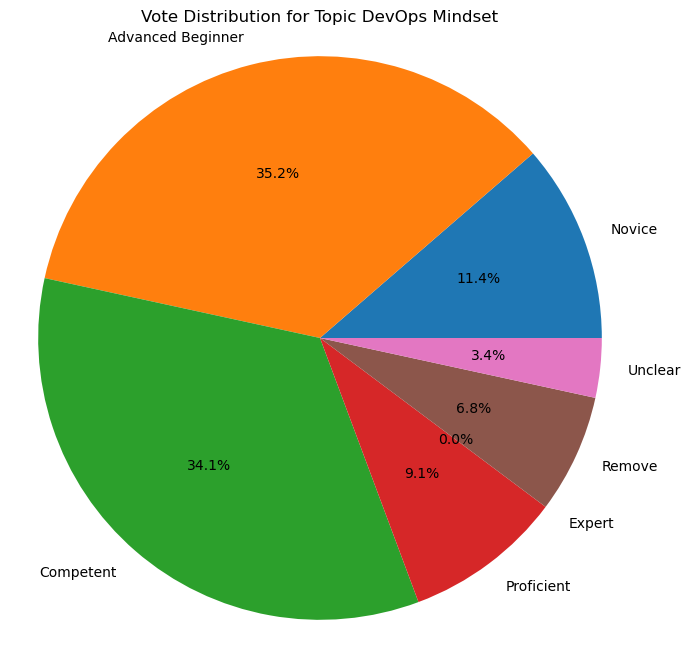

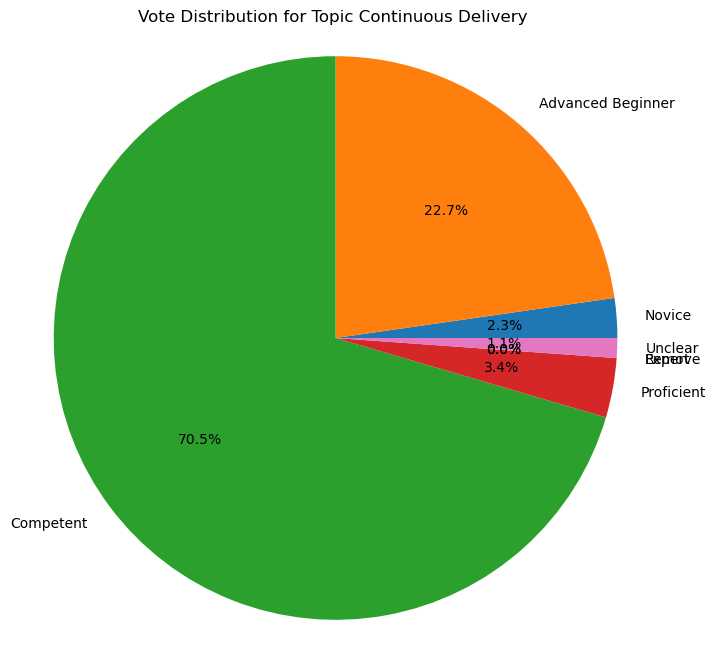

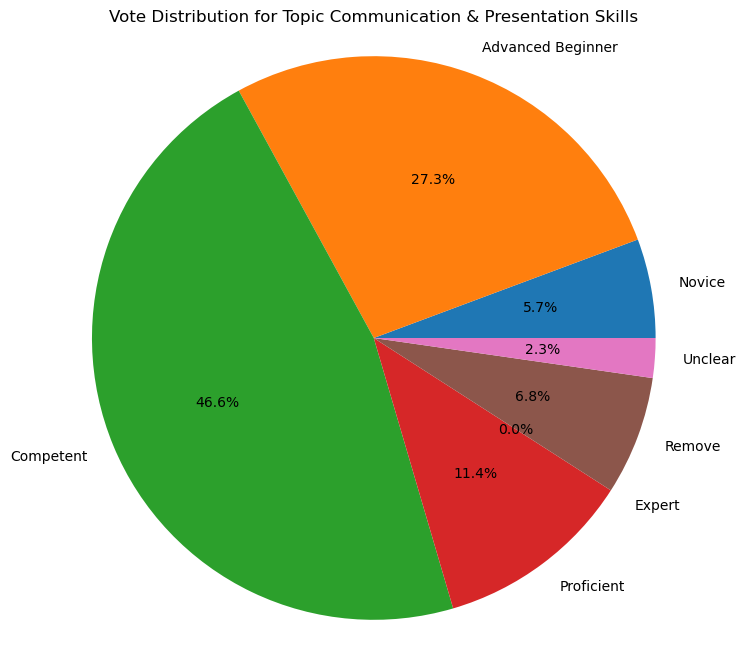

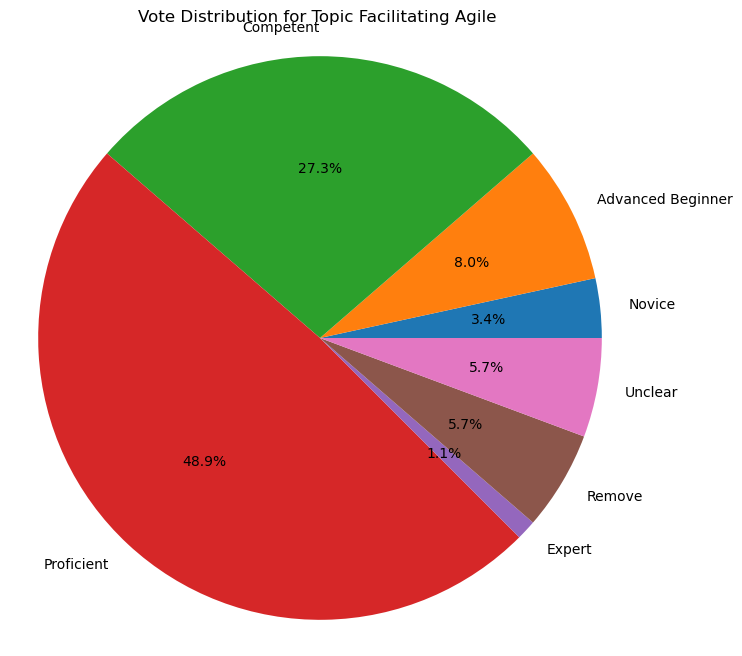

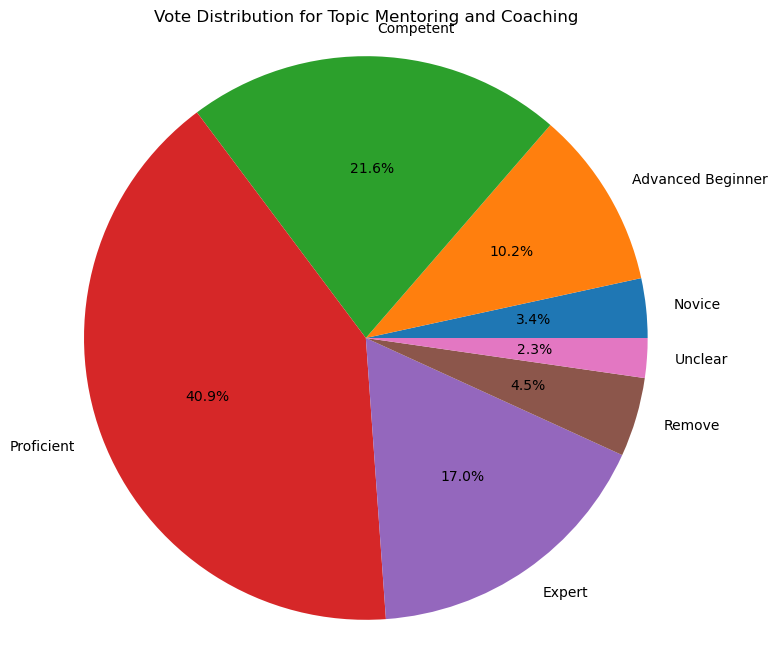

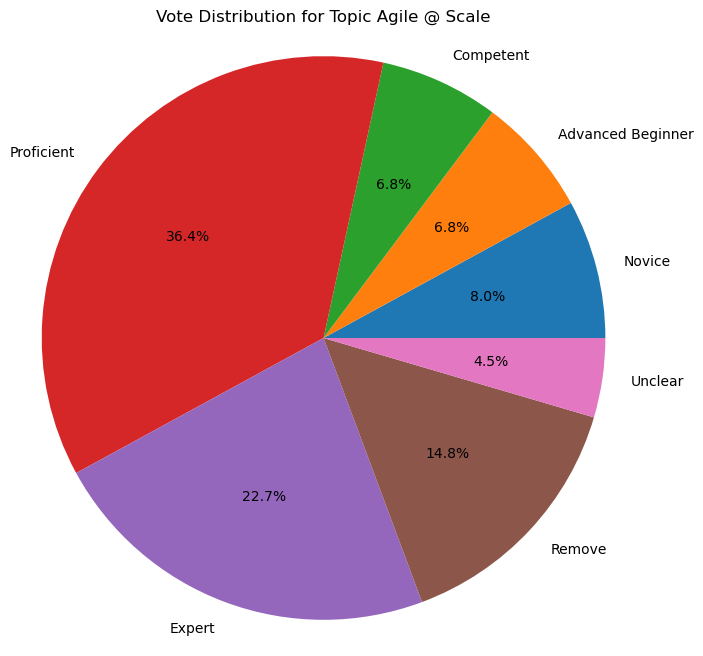

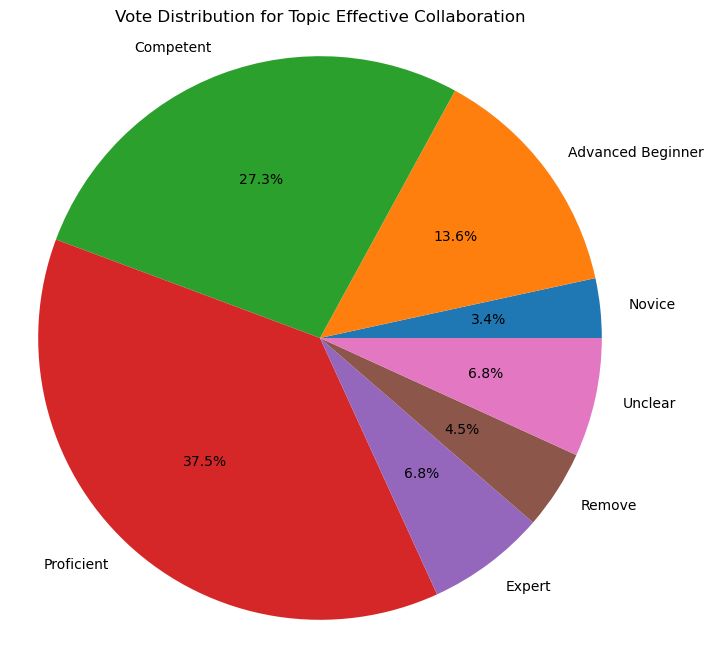

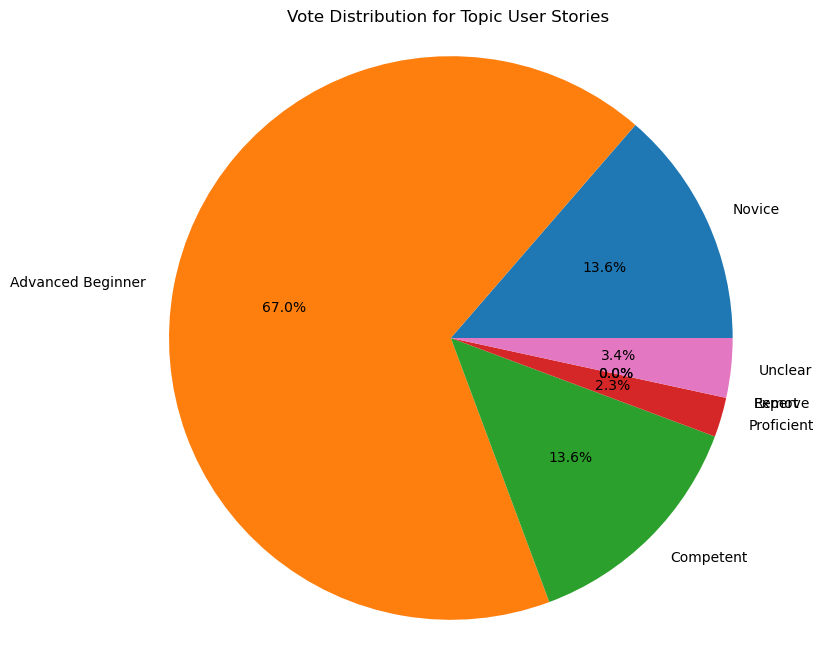

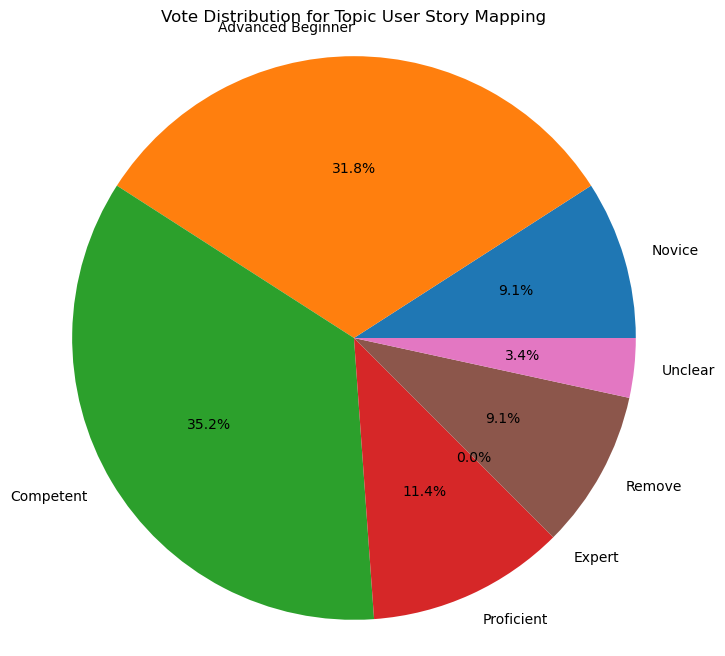

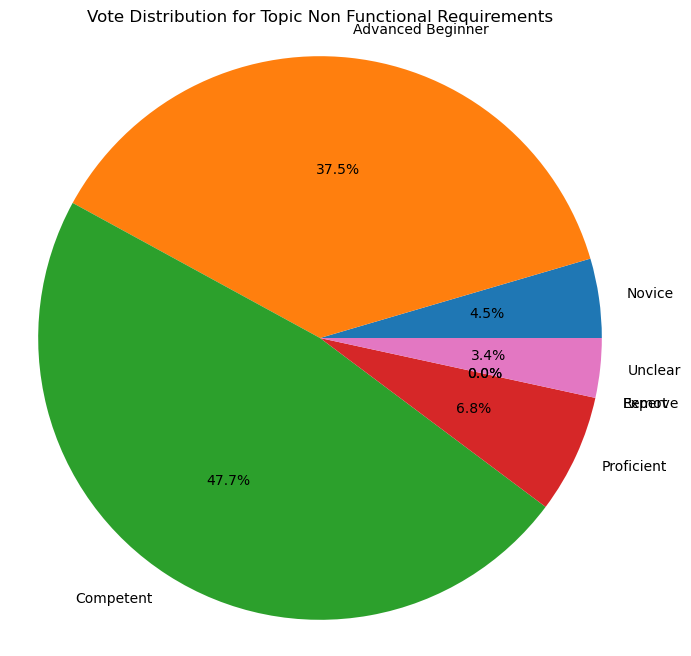

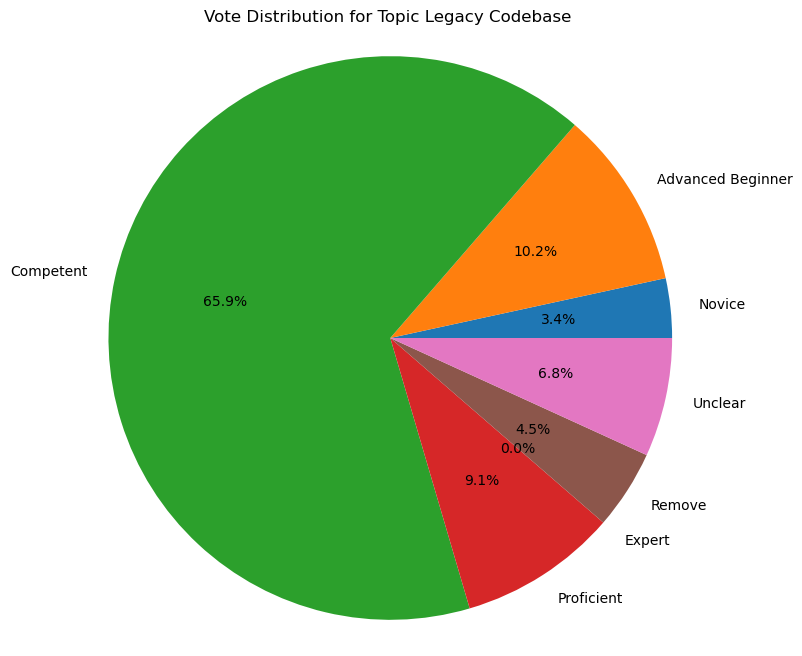

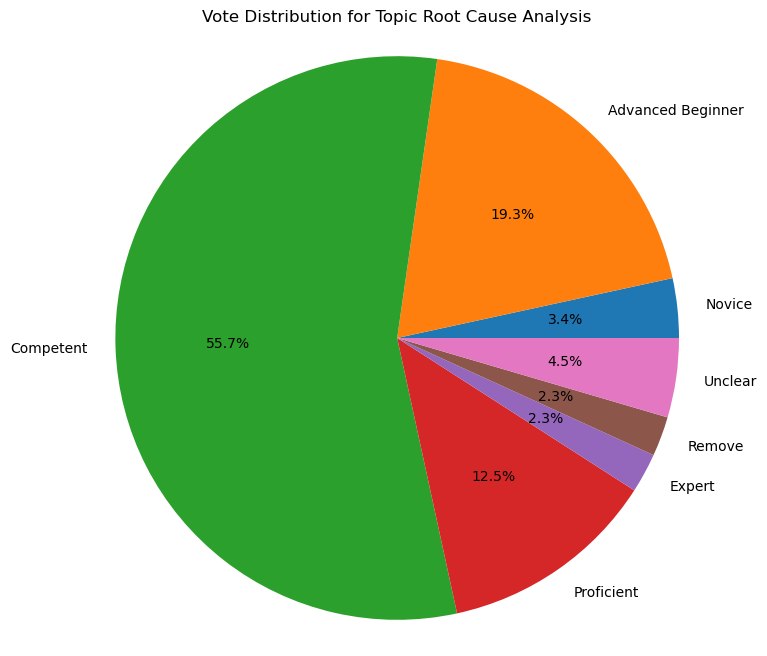

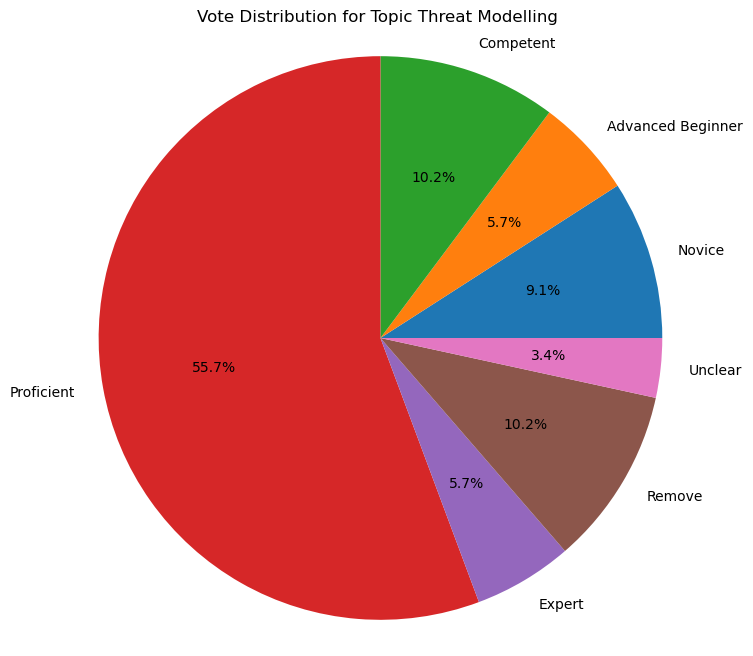

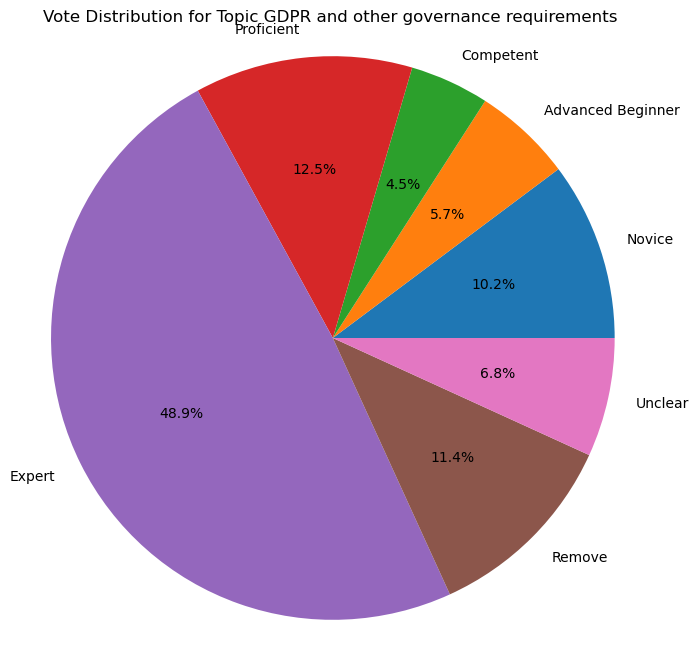

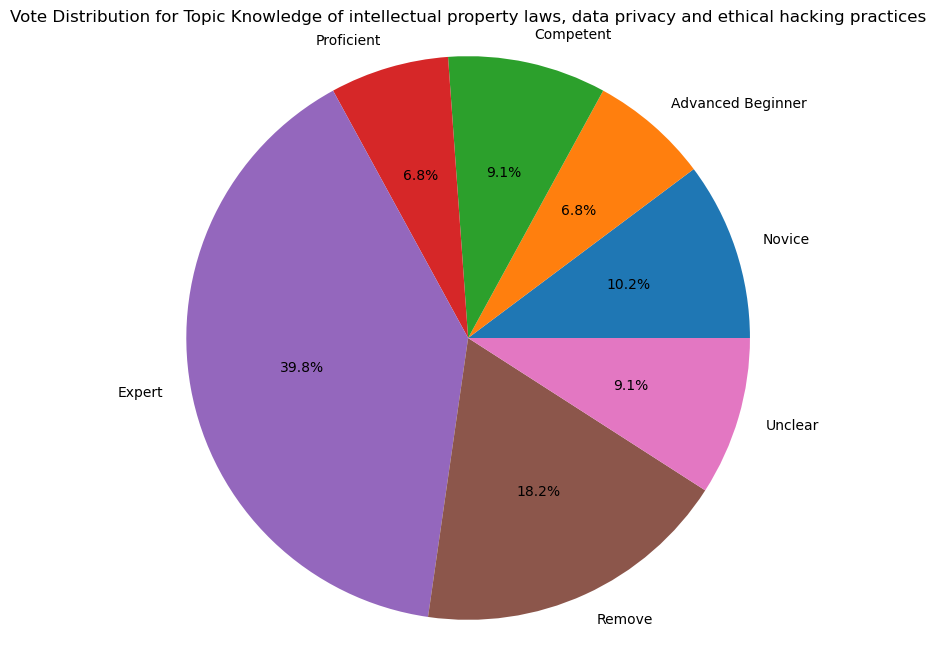

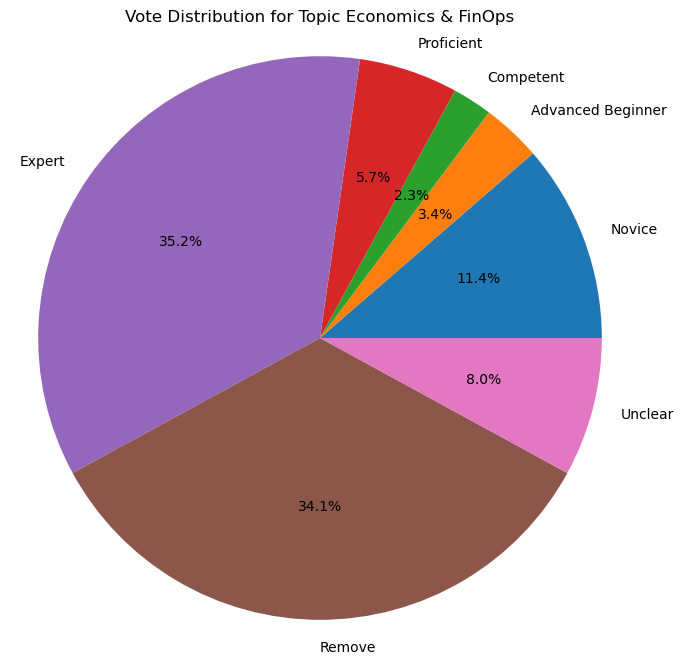

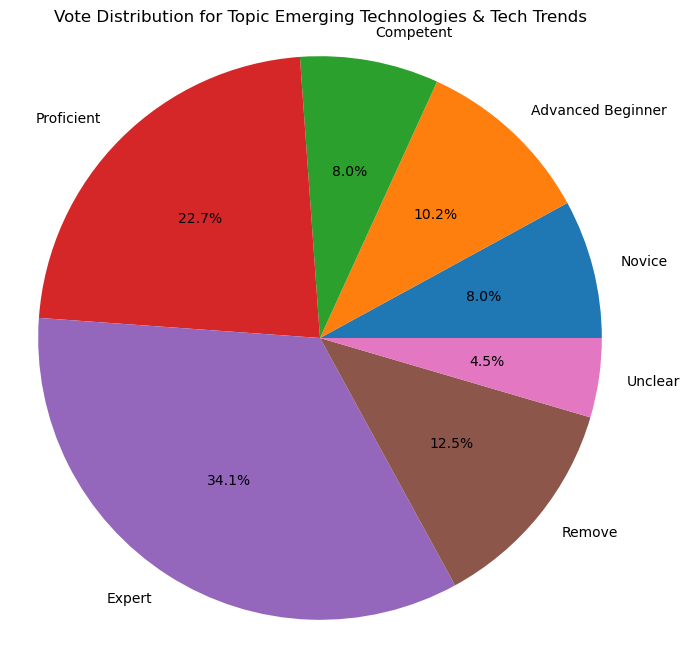

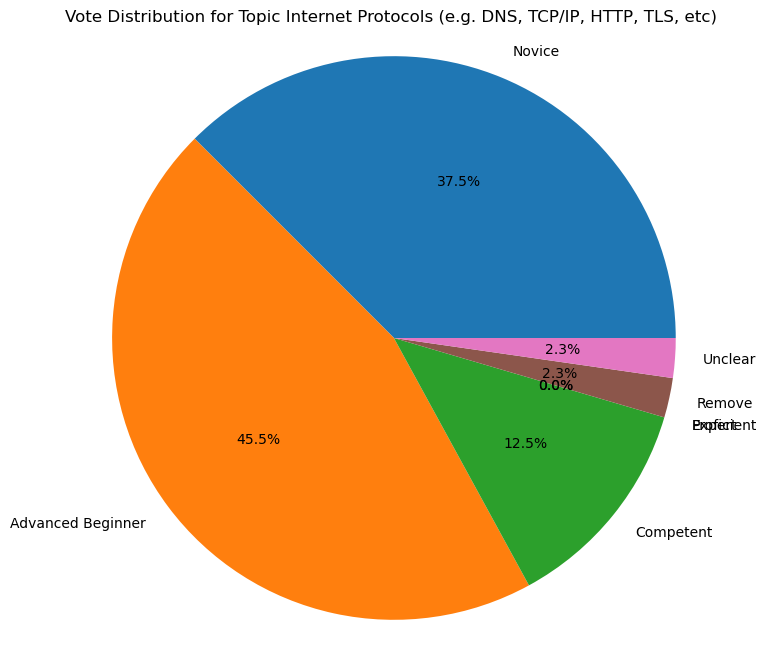

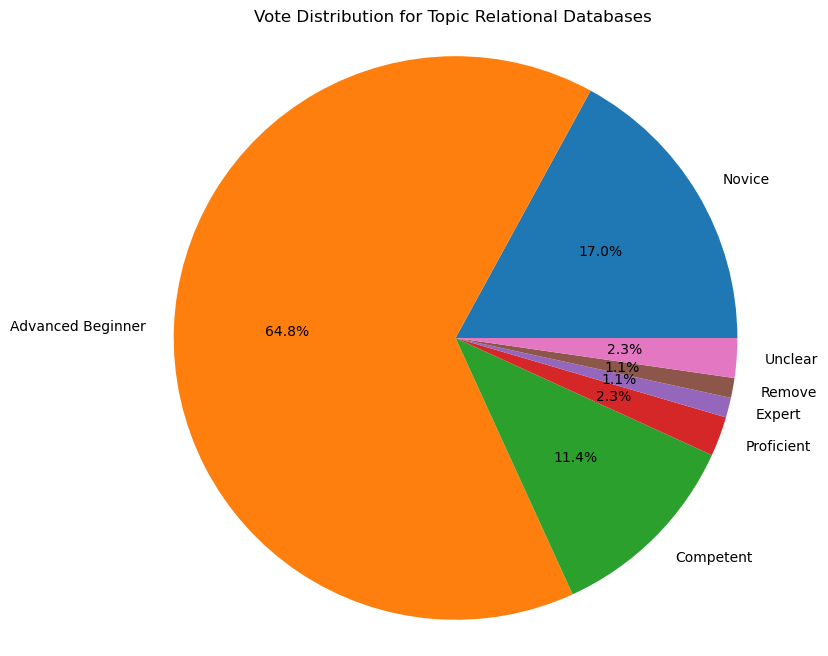

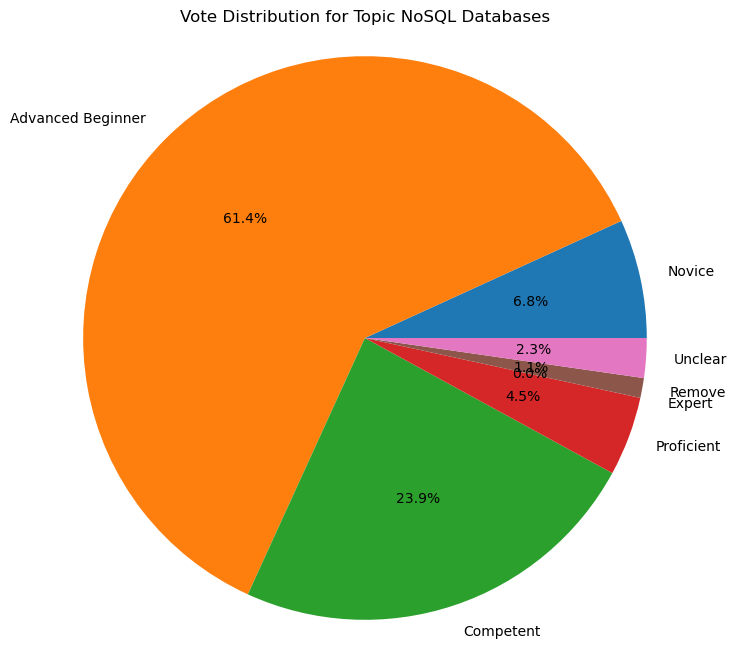

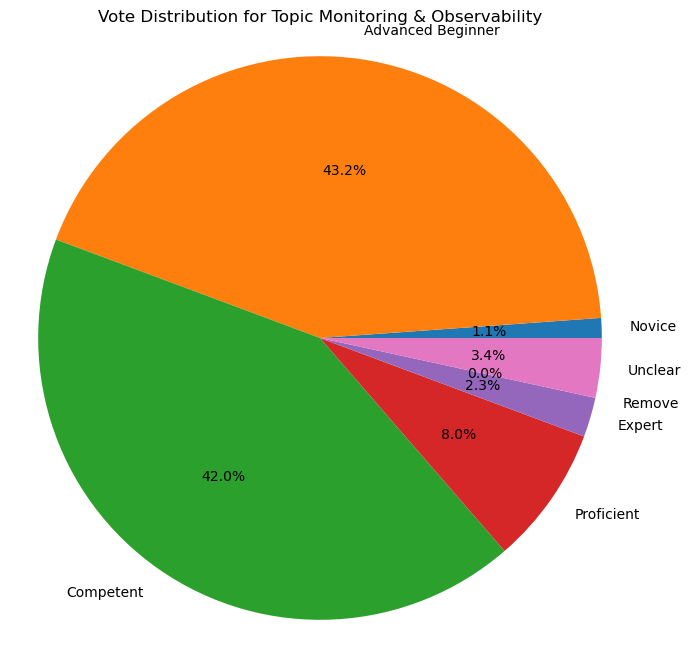

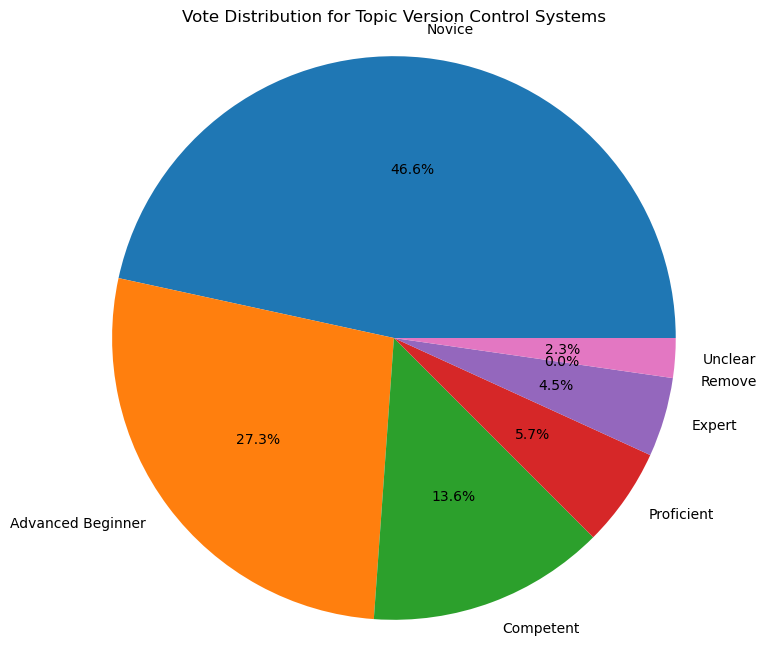

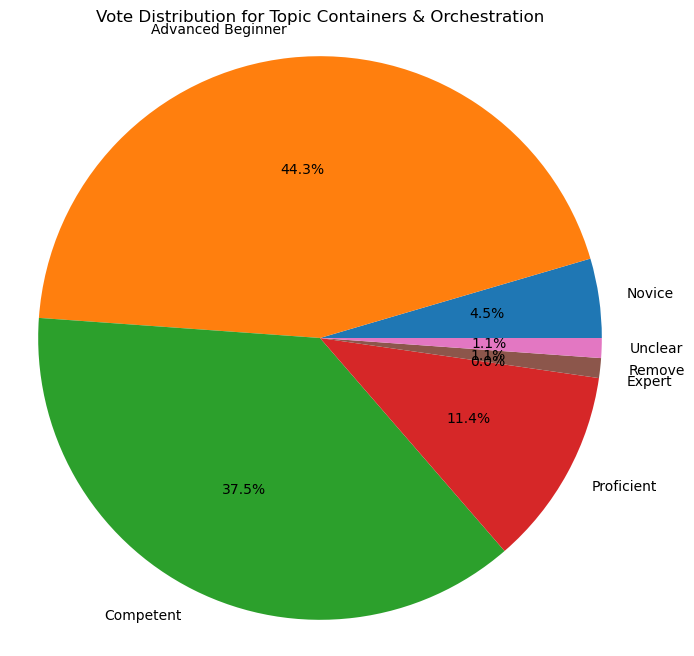

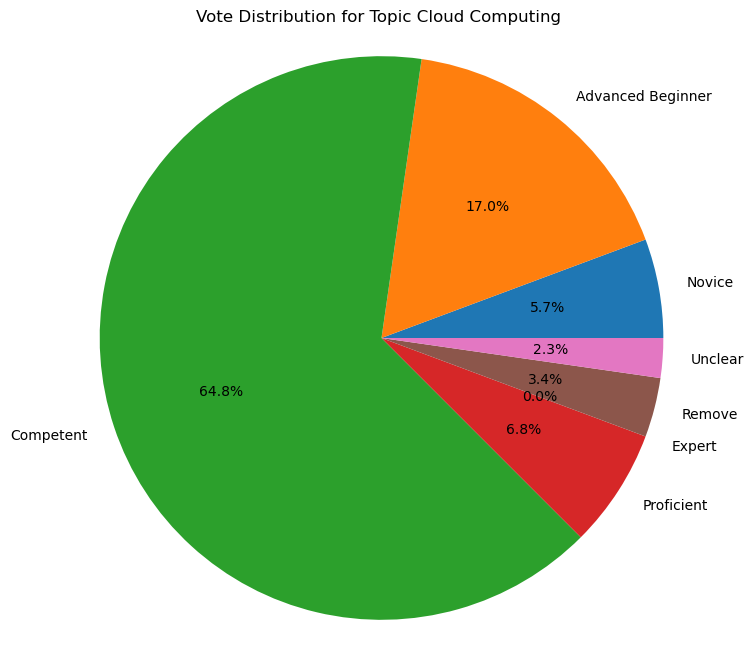

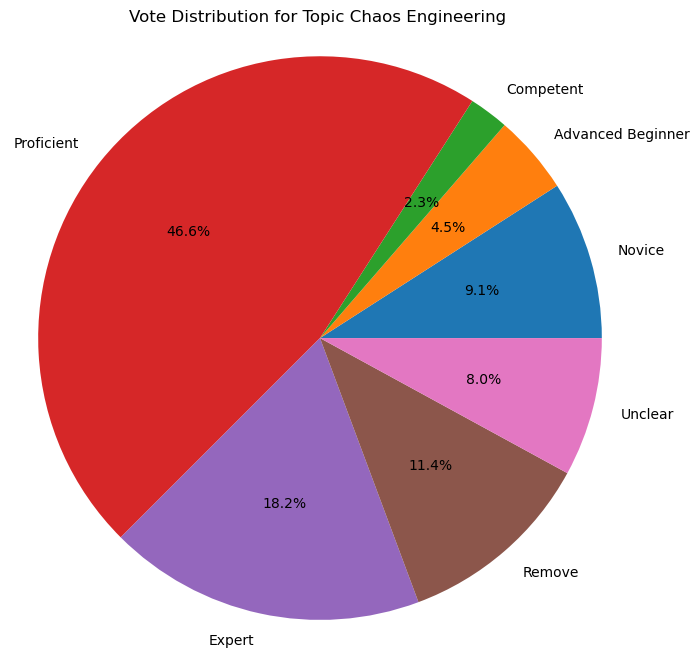

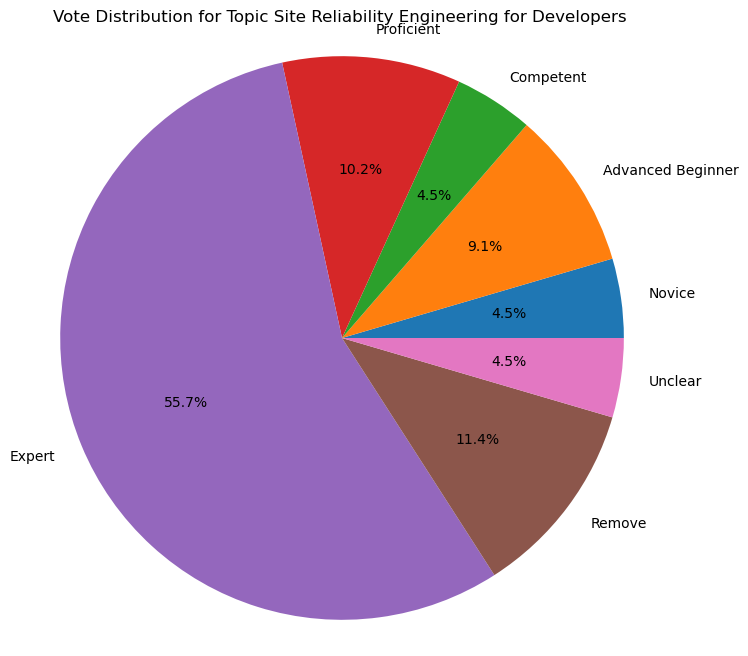

In [35]:
for index, row in overview.iterrows():
    plt.figure(figsize=(8,8))
    labels = ['Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert', 'Remove', 'Unclear']
    sizes = row[['Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert', 'Not a Core SE archetype topic', 'Unclear']].values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Vote Distribution for Topic {row["index"]}')
    plt.axis('equal')
    plt.show()
